<a href="https://colab.research.google.com/github/Chanakarn06/DWDM21/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **สมาชิก**
ชื่อกลุ่ม : Natasha Romanoff

1.623020514-5 จุฑากาญจน์ ชิงจันทร์

2.623021047-5 ฐิติวัฒน์ จันทรเสนา

3.623021042-5 ขนิษฐา ภูโสภา

4.623021043-3 จิตติยา ศิริธรรมจักร

5.623021046-7 ชนกานต์ พูลผล

#**DATA**

## แหล่งข้อมูล
**1** การนำเข้าปุ๋ยเคมี (รายประเทศ)\
องค์กร : ศูนย์เทคโนโลยีสารสนเทศและการสื่อสาร กรมวิชาการเกษตร
จาก : https://data.go.th

**2** การนำเข้าเมล็ดพันธุ์ควบคุม (รายประเทศ)\
องค์กร : ศูนย์เทคโนโลยีสารสนเทศและการสื่อสาร กรมวิชาการเกษตร
จาก : https://data.go.th

**3** สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง\
องค์กร : ศูนย์เทคโนโลยีสารสนเทศและการสื่อสาร กรมวิชาการเกษตร
จาก : https://data.go.th

**4** ข้อมูลทั่วไปของประเทศที่นำเข้าสินค้าทางการเกษตร



File for this project : https://drive.google.com/drive/folders/1PCwak7QUVizd6sfY-NvAZBRLNh5N-fhz?usp=sharing

# วัตถุประสงค์
เพื่อทำนายว่าจำนวนประชากร รายได้ ค่าครองชีพ มีผลต่อการนำเข้าสินค้าทางการเกษตรหรือไม่ โดยจะจัดกลุ่มปริมาณการนำเข้าสินค้าให้อยู่ในกลุ่มน้อย หรือกลุ่มมาก

### ตารางข้อมูลทั้งหมด 4 ตาราง นั้นคือ 

1. การนำเข้าปุ๋ยเคมี (รายประเทศ)
> มี 19 attibute 
2. การนำเข้าเมล็ดพันธุ์ควบคุม (รายประเทศ)
> มี 21 attibute 
3. สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง
> มี 20 attibute 
4. ข้อมูลทั่วไปของประเทศที่นำเข้าสินค้าทางการเกษตร
> มี 9 attibute 

### การเชื่อมไดร์ฟเพื่อดึงข้อมูลจากไดร์ฟ

In [235]:
import pandas as pd #เพื่อใช้ทำงานกับข้อมูลที่เป็นรูปแบบตาราง
import os           #เพื่อจัดการกับไฟล์ และ ตัว path ที่เราจะนำเข้า

In [236]:
from google.colab import drive#เชื่อมข้อมูล เพราะเราจะทำการนำเข้าข้อมูล โดยให้ดึงมาจาก google drive ของเรา
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [237]:
path = '/content/drive/My Drive/Project'#โดยเราจะทำการระบุให้ชี้ไปที่ โฟนเดอร์ที่เราเซฟไฟล์ไว้ หรือก็คือ โฟนเดอร์ Project

#**Preprocessing**

##**ตารางที่ 1 ตาราง ปริมาณการนำเข้าปุ๋ยเคมี**

In [238]:
data_fc = pd.read_csv(os.path.join(path,'ปริมาณการนำเข้าปุ๋ยเคมี.csv'))
data_fc #การนำเข้าไฟล์ที่มีตัวแปรคือdata_fc

,id,Title,Subtitle_FC,Unit,View,Freq,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Unnamed: 19
0,1.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"582,636.00","787,997.00","672,800.00","1,007,240.00","858,295.00","869,573.00","1,050,904.00","1,008,322.00","1,051,742.00","999,195.06","1,058,661.00","1,180,532.00",927324.755,NaN
1,2.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,CHINA,เมตริกตัน,ประเทศ,รายปี,"270,060.53","675,840.83","569,348.49","427,921.66","723,621.87","728,466.14","610,452.25","472,653.78","746,048.64","708,995.53","865,728.91","949,696.61",645736.27,NaN
2,3.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"426,401.90","472,745.91","287,250.00","417,478.50","435,164.70","528,138.20","443,139.60","425,380.00","358,277.95","303,010.00","276,959.51","335,142.27",392424.045,NaN
3,4.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,QATAR,เมตริกตัน,ประเทศ,รายปี,"268,274.00","445,726.00","460,968.00","387,572.71","380,881.23","403,071.27","472,870.41","526,558.08","430,408.53","331,931.77","451,942.09","654,577.16",434565.1042,NaN
4,5.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,MALAYSIA,เมตริกตัน,ประเทศ,รายปี,"244,645.54","234,427.46","173,449.15","285,714.33","292,836.88","201,669.47","292,360.67","276,166.76","243,072.57","194,100.98","188,477.92","404,790.14",252642.6558,NaN
5,6.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,RUSSIAN FEDERATION (CIS),เมตริกตัน,ประเทศ,รายปี,"271,118.00","399,021.62","300,699.57","248,145.52","663,041.93","882,062.94","979,020.81","1,016,522.47","753,518.99","581,231.30","486,795.15","578,495.49",596639.4825,NaN
6,7.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,KUWAIT,เมตริกตัน,ประเทศ,รายปี,"175,789.27","71,839.00","94,201.00","161,139.82","151,097.30","159,859.70","130,217.30","131,996.98","102,995.80","156,195.80","176,403.60","200,013.80","75,065.40",NaN
7,8.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,EGYPT,เมตริกตัน,ประเทศ,รายปี,"32,032.00",0,"39,248.00","153,836.04",0,"25,603.48",0,0,"3,185.31",26.86,"2,574.52","30,216.83","4,292.37",NaN
8,9.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,NORWAY,เมตริกตัน,ประเทศ,รายปี,"217,081.00","270,570.60","258,979.53","128,176.42","255,372.18","252,568.71","187,418.88","287,254.83","315,311.67","188,175.93","284,908.87","269,816.52","195,650.60",NaN
9,10.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,CANADA,เมตริกตัน,ประเทศ,รายปี,"174,147.00","222,895.00","280,535.00","77,984.00","226,749.00","326,305.00","262,506.00","276,743.00","282,425.00","247,987.95","264,827.33","326,780.02",247490.3583,NaN


In [239]:
data_fc.shape #.shape ใช้ข้อมูลว่า array นั้นมีสมาชิกกี่ตัว กี่แถว กี่คอลัมน์ กี่ตาราง ซึ่ง data_fc มี34แถว 20 คอลัมน์ 
#แต่เมื่อตรวจสอบที่ไฟล์ต้นททางพบว่า แถวและคอลัมน์ที่ขึ้น แนน เป็นส่วนที่ไม่ได้ใช้ดังนั้นต้องทำการตัดคอลัมน์ที่ 20 ออก และแถว32-33

(34, 20)

###**ตัดคอลัมน์ที่ 20 ออก**
โดยการใช้ .iloc ให้ตัดคอลัมน์มาแค่คอลัมน์ 0-18

In [240]:
data_fcUSE = data_fc.iloc[:,:19]
data_fcUSE

,id,Title,Subtitle_FC,Unit,View,Freq,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018
0,1.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"582,636.00","787,997.00","672,800.00","1,007,240.00","858,295.00","869,573.00","1,050,904.00","1,008,322.00","1,051,742.00","999,195.06","1,058,661.00","1,180,532.00",927324.755
1,2.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,CHINA,เมตริกตัน,ประเทศ,รายปี,"270,060.53","675,840.83","569,348.49","427,921.66","723,621.87","728,466.14","610,452.25","472,653.78","746,048.64","708,995.53","865,728.91","949,696.61",645736.27
2,3.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"426,401.90","472,745.91","287,250.00","417,478.50","435,164.70","528,138.20","443,139.60","425,380.00","358,277.95","303,010.00","276,959.51","335,142.27",392424.045
3,4.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,QATAR,เมตริกตัน,ประเทศ,รายปี,"268,274.00","445,726.00","460,968.00","387,572.71","380,881.23","403,071.27","472,870.41","526,558.08","430,408.53","331,931.77","451,942.09","654,577.16",434565.1042
4,5.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,MALAYSIA,เมตริกตัน,ประเทศ,รายปี,"244,645.54","234,427.46","173,449.15","285,714.33","292,836.88","201,669.47","292,360.67","276,166.76","243,072.57","194,100.98","188,477.92","404,790.14",252642.6558
5,6.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,RUSSIAN FEDERATION (CIS),เมตริกตัน,ประเทศ,รายปี,"271,118.00","399,021.62","300,699.57","248,145.52","663,041.93","882,062.94","979,020.81","1,016,522.47","753,518.99","581,231.30","486,795.15","578,495.49",596639.4825
6,7.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,KUWAIT,เมตริกตัน,ประเทศ,รายปี,"175,789.27","71,839.00","94,201.00","161,139.82","151,097.30","159,859.70","130,217.30","131,996.98","102,995.80","156,195.80","176,403.60","200,013.80","75,065.40"
7,8.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,EGYPT,เมตริกตัน,ประเทศ,รายปี,"32,032.00",0,"39,248.00","153,836.04",0,"25,603.48",0,0,"3,185.31",26.86,"2,574.52","30,216.83","4,292.37"
8,9.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,NORWAY,เมตริกตัน,ประเทศ,รายปี,"217,081.00","270,570.60","258,979.53","128,176.42","255,372.18","252,568.71","187,418.88","287,254.83","315,311.67","188,175.93","284,908.87","269,816.52","195,650.60"
9,10.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,CANADA,เมตริกตัน,ประเทศ,รายปี,"174,147.00","222,895.00","280,535.00","77,984.00","226,749.00","326,305.00","262,506.00","276,743.00","282,425.00","247,987.95","264,827.33","326,780.02",247490.3583


###**ตัดแถว 32-33**
โดยการใช้ .dropna ซึ่งจะใช้ตัดแถวข้อมูลที่มีค่า missing

In [241]:
data_FC = data_fcUSE.dropna() #ใช้ dropna เพื่อต้องการลบข้อมูลทั้งแถวออกเมื่อมีคอลัมน์ใดคอลัมน์หนึ่งเป็น NaN
data_FC

,id,Title,Subtitle_FC,Unit,View,Freq,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018
0,1.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"582,636.00","787,997.00","672,800.00","1,007,240.00","858,295.00","869,573.00","1,050,904.00","1,008,322.00","1,051,742.00","999,195.06","1,058,661.00","1,180,532.00",927324.755
1,2.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,CHINA,เมตริกตัน,ประเทศ,รายปี,"270,060.53","675,840.83","569,348.49","427,921.66","723,621.87","728,466.14","610,452.25","472,653.78","746,048.64","708,995.53","865,728.91","949,696.61",645736.27
2,3.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"426,401.90","472,745.91","287,250.00","417,478.50","435,164.70","528,138.20","443,139.60","425,380.00","358,277.95","303,010.00","276,959.51","335,142.27",392424.045
3,4.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,QATAR,เมตริกตัน,ประเทศ,รายปี,"268,274.00","445,726.00","460,968.00","387,572.71","380,881.23","403,071.27","472,870.41","526,558.08","430,408.53","331,931.77","451,942.09","654,577.16",434565.1042
4,5.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,MALAYSIA,เมตริกตัน,ประเทศ,รายปี,"244,645.54","234,427.46","173,449.15","285,714.33","292,836.88","201,669.47","292,360.67","276,166.76","243,072.57","194,100.98","188,477.92","404,790.14",252642.6558
5,6.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,RUSSIAN FEDERATION (CIS),เมตริกตัน,ประเทศ,รายปี,"271,118.00","399,021.62","300,699.57","248,145.52","663,041.93","882,062.94","979,020.81","1,016,522.47","753,518.99","581,231.30","486,795.15","578,495.49",596639.4825
6,7.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,KUWAIT,เมตริกตัน,ประเทศ,รายปี,"175,789.27","71,839.00","94,201.00","161,139.82","151,097.30","159,859.70","130,217.30","131,996.98","102,995.80","156,195.80","176,403.60","200,013.80","75,065.40"
7,8.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,EGYPT,เมตริกตัน,ประเทศ,รายปี,"32,032.00",0,"39,248.00","153,836.04",0,"25,603.48",0,0,"3,185.31",26.86,"2,574.52","30,216.83","4,292.37"
8,9.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,NORWAY,เมตริกตัน,ประเทศ,รายปี,"217,081.00","270,570.60","258,979.53","128,176.42","255,372.18","252,568.71","187,418.88","287,254.83","315,311.67","188,175.93","284,908.87","269,816.52","195,650.60"
9,10.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,CANADA,เมตริกตัน,ประเทศ,รายปี,"174,147.00","222,895.00","280,535.00","77,984.00","226,749.00","326,305.00","262,506.00","276,743.00","282,425.00","247,987.95","264,827.33","326,780.02",247490.3583


In [242]:
data_FC.shape #ตรวจสอบขนาดของตารางใหม่

(31, 19)

In [243]:
data_FC.isnull().any() #เชคว่าภายในตารางมีค่าว่างหรือไม่
#ไม่ม่ค่าว่างอยู่

id             False
Title          False
Subtitle_FC    False
Unit           False
View           False
Freq           False
Y2006          False
Y2007          False
Y2008          False
Y2009          False
Y2010          False
Y2011          False
Y2012          False
Y2013          False
Y2014          False
Y2015          False
Y2016          False
Y2017          False
Y2018          False
dtype: bool

##**ตารางที่ 2 ตาราง ปริมาณการนำเข้าเมล็ดพันธุ์**

In [244]:
data_pc = pd.read_csv(os.path.join(path,'ปริมาณการนำเข้าเมล็ดพันธุ์.csv')) #การนำเข้าไฟล์ที่มีตัวแปรคือdata_pc
data_pc

,id,Title,Subtitle_PC,Unit,View,Freq,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,1,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"4,910.26","6,203.20","6,274.60","4,090.01","4,427.09","1,961.45","2,980.24","6,262.60","5,689.41","3,091.60","8,182.42","8,778.60","3,060.24","6,909.40","6,849.32"
1,2,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,CHINA,เมตริกตัน,ประเทศ,รายปี,"124,916.36","46,686.16","47,946.76","5,675.89","6,870.47","9,738.47","3,796.07","6,479.97","4,689.86","3,568.08","37,890.50","44,373.90","5,544.60","3,023.29","3,460.13"
2,3,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"35,847","59,459.38","165,267.43","12,467.58","259,375.78","356,372.62","682,724.86","738,370.00","756,349.34","379,566.84","893,000.00","90,000.00","27,000.00","68,787.67","10,469.92"
3,4,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,QATAR,เมตริกตัน,ประเทศ,รายปี,"47,414.77","124,915.02","580,000.00","21,176.02","439,619.60","591,966.00","1,977,507.00","3,305,691.43","1,033,485.31","132,251.55","6,033.50","1,104.20","37,697.36","5,947.01","18,978.08"
4,5,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,MALAYSIA,เมตริกตัน,ประเทศ,รายปี,"37,645.03","46,467.47","23,567.58","57,468.97","43,853.56","34,853.57","35,568.35","46,865.57","35,456.56","45,357.68","46,646.36","8,074.23","5,864.26","7,467.67","13,467.65"
5,6,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,RUSSIAN FEDERATION (CIS),เมตริกตัน,ประเทศ,รายปี,"29,043.91","48,355.61","20,411.79","36,064.85","58,854.49","11,252.81","16,244.27","15,039.72","12,239.65","26,248.50","11,443.81","14,488.36","9,978.89","9,152.59","8,830.02"
6,7,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,KUWAIT,เมตริกตัน,ประเทศ,รายปี,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,"1,758,000.00","1,358,167.00","1,072,741.00","258,390.00","1,061,682.00"
7,8,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,EGYPT,เมตริกตัน,ประเทศ,รายปี,0,0,0,0,0,0,0,0,0,0,151,505.5,510,153.7,312.5
8,9,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,NORWAY,เมตริกตัน,ประเทศ,รายปี,"147,333.96","193,369.60","250,262.78","216,184.72","4,521,927.60","78,508.48","237,894.47","241,648.61","183,657.23","171,992.31","184,063.76","127,853.72","159,201.86","140,890.69","203,280.67"
9,10,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,CANADA,เมตริกตัน,ประเทศ,รายปี,"32,735.98","37,385.12","41,710.18","36,548.71","41,287.48","38,247.43","26,492.64","29,982.01","26,853.24","31,945.94","45,066.43","72,677.88","44,226.71","37,915.23","42,485.37"


In [245]:
data_pc.shape

(32, 21)

##**ตารางที่ 3 ตาราง สารป้องกันและกำจัดโรคพืช**

In [246]:
data_pd = pd.read_csv(os.path.join(path,'สารป้องกันและกำจัดโรคพืช.csv')) #การนำเข้าไฟล์ที่มีตัวแปรคือdata_pd
data_pd

,id,Title,Subtitle_PD,Unit,View,Freq,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Unnamed: 20
0,1,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,SAUDI ARABIA,กิโลกรัม,ประเทศ,รายปี,"2,249,315.00","2,143,682.00","1,192,758.30","1,829,041.50","1,867,354.50","1,404,900.00","1,891,636.00","1,794,707.00","1,848,395.00","2,074,101.00","2,773,214.60","2,789,352.25","2,249,075.00","1,893,065.00",NaN
1,2,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,CHINA,กิโลกรัม,ประเทศ,รายปี,"1,160,075.00","1,519,815.00","782,375.00","794,125.00","736,610.00","4,517.00","222,750.00","775,000.00","610,500.00","524,056.80","270,000.00","353,631.00","373,507.00",625150.9077,NaN
2,3,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,KOREA REPUBLIC OF,กิโลกรัม,ประเทศ,รายปี,"1,875,370.00","1,724,557.00","1,332,152.90","1,002,940.60","1,778,427.60","763,273.50","1,201,126.00","1,347,522.00","1,503,846.00","1,750,676.64","2,392,512.50","1,974,102.84","2,274,394.04","2,501,570.96",NaN
3,4,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,QATAR,กิโลกรัม,ประเทศ,รายปี,"647,240.00","890,090.00","665,440.00","673,721.00","742,418.00","732,970.00","783,931.00","1,465,079.00","2,444,760.00","1,472,750.00","3,733,675.00","5,940,771.00","6,381,231.75","2,592,601.20",NaN
4,5,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,MALAYSIA,กิโลกรัม,ประเทศ,รายปี,"709,000.00","512,800.00","420,400.00","708,000.00","781,310.00","474,262.00","764,404.00","674,049.00","484,012.00","723,500.00","787,000.00","551,000.00","299,800.00","463,530.00",NaN
5,6,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,RUSSIAN FEDERATION (CIS),กิโลกรัม,ประเทศ,รายปี,"101,198.00","120,678.00","194,505.00","392,673.30","234,041.00","317,680.00","375,921.00","377,982.00","322,012.00","382,155.71","473,435.65","485,576.76","425,200.00","372,827.00",NaN
6,7,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,KUWAIT,กิโลกรัม,ประเทศ,รายปี,"28,790.00","29,875.00","160,147.20","267,567.20","325,673.30","353,488.00","434,042.00","431,027.00","242,024.00","354,884.73","462,819.48","403,756.40","375,010.00",297623.4085,NaN
7,8,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,EGYPT,กิโลกรัม,ประเทศ,รายปี,"327,000.00","313,200.00","149,603.00","294,000.00","351,049.90","374,000.00","596,777.00","546,375.00","428,400.00","476,000.00","616,010.00","382,204.03","393,960.00",403736.8408,NaN
8,9,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,NORWAY,กิโลกรัม,ประเทศ,รายปี,"35,776.00","427,341.00","152,960.00","455,887.00","608,253.00","226,901.00","614,174.00","405,157.00","508,189.00","599,519.00","1,355,992.00","1,034,266.00","916,249.00","919,208.00",NaN
9,10,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,CANADA,กิโลกรัม,ประเทศ,รายปี,"193,252.00","268,944.00","273,904.00","190,107.00","270,549.00","342,470.00","270,412.00","177,200.00","224,740.00","290,050.00","488,800.00","387,002.00","479,400.00","397,400.00",NaN


In [247]:
data_pd.shape
#ข้อมูลมีค่า NaN แต่เมื่อตรวจสอบที่ไฟล์ต้นททางพบว่า แถวและคอลัมน์ที่ขึ้น NaN เป็นส่วนที่ไม่ได้ใช้ดังนั้นต้องทำการตัดคอลัมน์ที่ 9 ออก

(32, 21)

####**รวมตารางครั้งที่ 1**

In [248]:
merged_data_FC_data_pc = data_FC.merge(data_pc,how='left',left_on='Subtitle_FC',right_on='Subtitle_PC')
merged_data_FC_data_pc #ใช้ merged เป็นการเชื่อมตาราง data_FC และ data_pc ในแนวแกนX

,id_x,Title_x,Subtitle_FC,Unit_x,View_x,Freq_x,Y2006_x,Y2007_x,Y2008_x,Y2009_x,Y2010_x,Y2011_x,Y2012_x,Y2013_x,Y2014_x,Y2015_x,Y2016_x,Y2017_x,Y2018_x,id_y,Title_y,Subtitle_PC,Unit_y,View_y,Freq_y,Y2006_y,Y2007_y,Y2008_y,Y2009_y,Y2010_y,Y2011_y,Y2012_y,Y2013_y,Y2014_y,Y2015_y,Y2016_y,Y2017_y,Y2018_y,Y2019,Y2020
0,1.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"582,636.00","787,997.00","672,800.00","1,007,240.00","858,295.00","869,573.00","1,050,904.00","1,008,322.00","1,051,742.00","999,195.06","1,058,661.00","1,180,532.00",927324.755,1,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"4,910.26","6,203.20","6,274.60","4,090.01","4,427.09","1,961.45","2,980.24","6,262.60","5,689.41","3,091.60","8,182.42","8,778.60","3,060.24","6,909.40","6,849.32"
1,2.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,CHINA,เมตริกตัน,ประเทศ,รายปี,"270,060.53","675,840.83","569,348.49","427,921.66","723,621.87","728,466.14","610,452.25","472,653.78","746,048.64","708,995.53","865,728.91","949,696.61",645736.27,2,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,CHINA,เมตริกตัน,ประเทศ,รายปี,"124,916.36","46,686.16","47,946.76","5,675.89","6,870.47","9,738.47","3,796.07","6,479.97","4,689.86","3,568.08","37,890.50","44,373.90","5,544.60","3,023.29","3,460.13"
2,3.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"426,401.90","472,745.91","287,250.00","417,478.50","435,164.70","528,138.20","443,139.60","425,380.00","358,277.95","303,010.00","276,959.51","335,142.27",392424.045,3,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"35,847","59,459.38","165,267.43","12,467.58","259,375.78","356,372.62","682,724.86","738,370.00","756,349.34","379,566.84","893,000.00","90,000.00","27,000.00","68,787.67","10,469.92"
3,4.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,QATAR,เมตริกตัน,ประเทศ,รายปี,"268,274.00","445,726.00","460,968.00","387,572.71","380,881.23","403,071.27","472,870.41","526,558.08","430,408.53","331,931.77","451,942.09","654,577.16",434565.1042,4,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,QATAR,เมตริกตัน,ประเทศ,รายปี,"47,414.77","124,915.02","580,000.00","21,176.02","439,619.60","591,966.00","1,977,507.00","3,305,691.43","1,033,485.31","132,251.55","6,033.50","1,104.20","37,697.36","5,947.01","18,978.08"
4,5.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,MALAYSIA,เมตริกตัน,ประเทศ,รายปี,"244,645.54","234,427.46","173,449.15","285,714.33","292,836.88","201,669.47","292,360.67","276,166.76","243,072.57","194,100.98","188,477.92","404,790.14",252642.6558,5,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,MALAYSIA,เมตริกตัน,ประเทศ,รายปี,"37,645.03","46,467.47","23,567.58","57,468.97","43,853.56","34,853.57","35,568.35","46,865.57","35,456.56","45,357.68","46,646.36","8,074.23","5,864.26","7,467.67","13,467.65"
5,6.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,RUSSIAN FEDERATION (CIS),เมตริกตัน,ประเทศ,รายปี,"271,118.00","399,021.62","300,699.57","248,145.52","663,041.93","882,062.94","979,020.81","1,016,522.47","753,518.99","581,231.30","486,795.15","578,495.49",596639.4825,6,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,RUSSIAN FEDERATION (CIS),เมตริกตัน,ประเทศ,รายปี,"29,043.91","48,355.61","20,411.79","36,064.85","58,854.49","11,252.81","16,244.27","15,039.72","12,239.65","26,248.50","11,443.81","14,488.36","9,978.89","9,152.59","8,830.02"
6,7.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,KUWAIT,เมตริกตัน,ประเทศ,รายปี,"175,789.27","71,839.00","94,201.00","161,139.82","151,097.30","159,859.70","130,217.30","131,996.98","102,995.80","156,195.80","176,403.60","200,013.80","75,065.40",7,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,KUWAIT,เมตริกตัน,ประเทศ,รายปี,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,"1,758,000.00","1,358,167.00","1,072,741.00","258,390.00","1,061,682.00"
7,8.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,EGYPT,เมตริกตัน,ประเทศ,รายปี,"32,032.00",0,"39,248.00","153,836.04",0,"25,603.48",0,0,"3,185.31",26.86,"2,574.52","30,216.83","4,292.37",8,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,EGYPT,เมตริกตัน,ประเทศ,รายปี,0,0,0,0,0,0,0,0,0,0,151,505.5,510,153.7,312.5
8,9.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประ

####**รวมตารางครั้งที่ 2**

In [249]:
merged_03 = data_pd.merge(merged_data_FC_data_pc,how='left',left_on='Subtitle_PD',right_on='Subtitle_PC')
merged_03
#ใช้merged_03 เพื่อเชื่อมตารางเข้าด้วยกัน

,id,Title,Subtitle_PD,Unit,View,Freq,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019_x,Y2020_x,Unnamed: 20,id_x,Title_x,Subtitle_FC,Unit_x,View_x,Freq_x,Y2006_x,Y2007_x,Y2008_x,Y2009_x,Y2010_x,Y2011_x,Y2012_x,Y2013_x,Y2014_x,Y2015_x,Y2016_x,Y2017_x,Y2018_x,id_y,Title_y,Subtitle_PC,Unit_y,View_y,Freq_y,Y2006_y,Y2007_y,Y2008_y,Y2009_y,Y2010_y,Y2011_y,Y2012_y,Y2013_y,Y2014_y,Y2015_y,Y2016_y,Y2017_y,Y2018_y,Y2019_y,Y2020_y
0,1,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,SAUDI ARABIA,กิโลกรัม,ประเทศ,รายปี,"2,249,315.00","2,143,682.00","1,192,758.30","1,829,041.50","1,867,354.50","1,404,900.00","1,891,636.00","1,794,707.00","1,848,395.00","2,074,101.00","2,773,214.60","2,789,352.25","2,249,075.00","1,893,065.00",NaN,1.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"582,636.00","787,997.00","672,800.00","1,007,240.00","858,295.00","869,573.00","1,050,904.00","1,008,322.00","1,051,742.00","999,195.06","1,058,661.00","1,180,532.00",927324.755,1.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"4,910.26","6,203.20","6,274.60","4,090.01","4,427.09","1,961.45","2,980.24","6,262.60","5,689.41","3,091.60","8,182.42","8,778.60","3,060.24","6,909.40","6,849.32"
1,2,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,CHINA,กิโลกรัม,ประเทศ,รายปี,"1,160,075.00","1,519,815.00","782,375.00","794,125.00","736,610.00","4,517.00","222,750.00","775,000.00","610,500.00","524,056.80","270,000.00","353,631.00","373,507.00",625150.9077,NaN,2.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,CHINA,เมตริกตัน,ประเทศ,รายปี,"270,060.53","675,840.83","569,348.49","427,921.66","723,621.87","728,466.14","610,452.25","472,653.78","746,048.64","708,995.53","865,728.91","949,696.61",645736.27,2.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,CHINA,เมตริกตัน,ประเทศ,รายปี,"124,916.36","46,686.16","47,946.76","5,675.89","6,870.47","9,738.47","3,796.07","6,479.97","4,689.86","3,568.08","37,890.50","44,373.90","5,544.60","3,023.29","3,460.13"
2,3,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,KOREA REPUBLIC OF,กิโลกรัม,ประเทศ,รายปี,"1,875,370.00","1,724,557.00","1,332,152.90","1,002,940.60","1,778,427.60","763,273.50","1,201,126.00","1,347,522.00","1,503,846.00","1,750,676.64","2,392,512.50","1,974,102.84","2,274,394.04","2,501,570.96",NaN,3.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"426,401.90","472,745.91","287,250.00","417,478.50","435,164.70","528,138.20","443,139.60","425,380.00","358,277.95","303,010.00","276,959.51","335,142.27",392424.045,3.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"35,847","59,459.38","165,267.43","12,467.58","259,375.78","356,372.62","682,724.86","738,370.00","756,349.34","379,566.84","893,000.00","90,000.00","27,000.00","68,787.67","10,469.92"
3,4,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,QATAR,กิโลกรัม,ประเทศ,รายปี,"647,240.00","890,090.00","665,440.00","673,721.00","742,418.00","732,970.00","783,931.00","1,465,079.00","2,444,760.00","1,472,750.00","3,733,675.00","5,940,771.00","6,381,231.75","2,592,601.20",NaN,4.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,QATAR,เมตริกตัน,ประเทศ,รายปี,"268,274.00","445,726.00","460,968.00","387,572.71","380,881.23","403,071.27","472,870.41","526,558.08","430,408.53","331,931.77","451,942.09","654,577.16",434565.1042,4.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,QATAR,เมตริกตัน,ประเทศ,รายปี,"47,414.77","124,915.02","580,000.00","21,176.02","439,619.60","591,966.00","1,977,507.00","3,305,691.43","1,033,485.31","132,251.55","6,033.50","1,104.20","37,697.36","5,947.01","18,978.08"
4,5,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,MALAYSIA,กิโลกรัม,ประเทศ,รายปี,"709,000.00","512,800.00","420,400.00","708,000.00","781,310.00","474,262.00","764,404.00","674,049.00","484,012.00","723,500.00","787,000.00","551,000.00","299,800.00","463,530.00",NaN,5.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,MALAYSIA,เมตริกตัน,ประเทศ,รายปี,"244,645.54","234,427.46","173,449.15","285,714.33","292,836.88","201,669.47","292,360.67","276,166

จากข้อมูลของตารางเบื้องต้น จะเห็นว่า มีข้อมูลที่เป็น NaN หรือ Not a Number เป็นจำนวนมาก ดังนั้นต้องทำการกำจัดค่า Missing value

In [250]:
merged_03.shape #.shape ใช้ข้อมูลว่า array นั้นมีสมาชิกกี่ตัว กี่แถว กี่คอลัมน์ กี่ตาราง ซึ่ง ตาราง merged_03 มี32 แถว 49 คอลัมน์

(32, 61)

In [251]:
merged_03.dropna().shape 
#ใช้ dropna เพื่อต้องการลบข้อมูลทั้งแถวออกเมื่อมีคอลัมน์ใดคอลัมน์หนึ่งเป็น NaN และใช้ .shape  เพื่อตรวจสอบว่ามี NAN กี่แถว กี่คอลัมน์

(0, 61)

In [252]:
merged_03.dropna().shape[0] 

0

คำนวณข้อมูลว่าหายไปกี่เปอร์เซ็น

In [253]:
removes = merged_03.shape[0] - merged_03.dropna().shape[0]
print(f'size before drop = {merged_03.shape[0]}')
print(f'size after drop = {merged_03.dropna().shape[0]}')
print(f'we lost {100*(removes/merged_03.shape[0])}% of data') #จากการคำนวณพบว่ามีข้อมูลที่หายไปถึง 0%

size before drop = 32
size after drop = 0
we lost 100.0% of data


จากการหาเปอร์เซ็นของข้อมูลที่โดนตัดไปจากการกำจัด Missing โดยการ dropna พบว่ามีข้อมูลหายไป 0% ซึ่งสมควรสามารถใช้วิธีนี้ได้ 

นอกจากนี้ ถ้าเกิดปัญหามีค่า Missing จากการพิจารณา Handle Missing Value แล้วพบว่า ข้อมูลของเราเป็น Numeric ดังนั้นต้องแทนค่าด้วยค่ากลาง(mean)

In [254]:
merged_03.mean() #หาค่ามีนทั้งหมด

id             16.500000
Unnamed: 20          NaN
id_x           16.225806
id_y           16.225806
dtype: float64

**ทดลอง**
ถ้าสนใจคอลัมน์ ปี 2016 2017 และ2018

In [255]:
merged_03[['Y2016_x']].mean()
#เติมมีนลงไปแทนค่า missing
#เราสามารถใช้ data.mean() ได้เพื่อหาค่ามีนทั้งหมดแต่จะนาน ดังนี้ชี้แค่ส่วนที่เราสนใจ

Series([], dtype: float64)

In [256]:
avg_age1=merged_03[['Y2016_x']].mean()
merged_03[['Y2016_x']] = merged_03[['Y2016_x']].fillna('Y2016_x')#ใช้ fillna เพื่อแทนค่าของ missing

In [257]:
avg_age2=merged_03[['Y2017_x']].mean()
merged_03[['Y2017_x']] = merged_03[['Y2017_x']].fillna('Y2017_x')#ใช้ fillna เพื่อแทนค่าของ missing

In [258]:
avg_age2=merged_03[['Y2018_x']].mean()
merged_03[['Y2018_x']] = merged_03[['Y2018_x']].fillna('Y2018_x')#ใช้ fillna เพื่อแทนค่าของ missing

In [259]:
merged_03.isnull().any()

id             False
Title          False
Subtitle_PD    False
Unit           False
View           False
               ...  
Y2016_y         True
Y2017_y         True
Y2018_y         True
Y2019_y         True
Y2020_y         True
Length: 61, dtype: bool

##**ตารางที่ 4 ตาราง ข้อมูลทั่วไปนำเข้าสินค้าทางเกษตร**
หาข้อมูลเพิ่ม

In [260]:
path = '/content/drive/My Drive/Project'#โดยเราจะทำการระบุให้ชี้ไปที่ โฟนเดอร์ที่เราเซฟไฟล์ไว้ หรือก็คือ โฟนเดอร์ Project

In [261]:
data_add = pd.read_csv(os.path.join(path,'ข้อมูลทั่วไปนำเข้าสินค้าทางเกษตร.csv'))
data_add

,id,country,View,population(million),religion,capital,language,living expenses(USD),avg income(USD),Unnamed: 9
0,1,SAUDI ARABIA,ประเทศ,34.22,อิสลาม,ริยาด,อาหรับ,952,"4,754",NaN
1,2,CHINA,ประเทศ,"1,400",พุทธ,ปักกิ่ง,จีนกลาง,752,884,NaN
2,3,KOREA REPUBLIC OF,ประเทศ,51,ไม่นับถือ,โซล,เกาหลี,"1,154","2,738",NaN
3,4,QATAR,ประเทศ,2,อิสลาม,โดฮา,อาหรับ,"1,856","4,684",NaN
4,5,MALAYSIA,ประเทศ,30,อิสลาม,กัวลาลัมเปอร์,มลายู,652,882,NaN
5,6,RUSSIAN FEDERATION (CIS),ประเทศ,146,คริสต์,มินสค์/มอสโก,รัสเซีย,424,891,NaN
6,7,KUWAIT,ประเทศ,4.207,อิสลาม,คูเวตซิตี,อาหรับ,"1,326","3,024",NaN
7,8,EGYPT,ประเทศ,93,อิสลาม,ไคโร,อาหรับ,449,250,NaN
8,9,NORWAY,ประเทศ,5.39,คริสต์,ออสโล,นอร์เวย์,"2,074","6,521",NaN
9,10,CANADA,ประเทศ,36.28,โรมันคาธอลิก,ออตตาวา,อังกฤษ/ฝรั่งเคส,"1,701","3,620",NaN


In [262]:
data_ADD = data_add.iloc[:,:9]
data_ADD

,id,country,View,population(million),religion,capital,language,living expenses(USD),avg income(USD)
0,1,SAUDI ARABIA,ประเทศ,34.22,อิสลาม,ริยาด,อาหรับ,952,"4,754"
1,2,CHINA,ประเทศ,"1,400",พุทธ,ปักกิ่ง,จีนกลาง,752,884
2,3,KOREA REPUBLIC OF,ประเทศ,51,ไม่นับถือ,โซล,เกาหลี,"1,154","2,738"
3,4,QATAR,ประเทศ,2,อิสลาม,โดฮา,อาหรับ,"1,856","4,684"
4,5,MALAYSIA,ประเทศ,30,อิสลาม,กัวลาลัมเปอร์,มลายู,652,882
5,6,RUSSIAN FEDERATION (CIS),ประเทศ,146,คริสต์,มินสค์/มอสโก,รัสเซีย,424,891
6,7,KUWAIT,ประเทศ,4.207,อิสลาม,คูเวตซิตี,อาหรับ,"1,326","3,024"
7,8,EGYPT,ประเทศ,93,อิสลาม,ไคโร,อาหรับ,449,250
8,9,NORWAY,ประเทศ,5.39,คริสต์,ออสโล,นอร์เวย์,"2,074","6,521"
9,10,CANADA,ประเทศ,36.28,โรมันคาธอลิก,ออตตาวา,อังกฤษ/ฝรั่งเคส,"1,701","3,620"


####**รวมตารางครั้งที่ 3**

In [263]:
merged_04 = data_ADD.merge(merged_03,how='left',left_on='country',right_on='Subtitle_PD') 
merged_04
#add table that about coutry anothor

,id_x,country,View_x,population(million),religion,capital,language,living expenses(USD),avg income(USD),id_y,Title,Subtitle_PD,Unit,View_y,Freq,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019_x,Y2020_x,Unnamed: 20,id_x,Title_x,Subtitle_FC,Unit_x,View_x,Freq_x,Y2006_x,Y2007_x,Y2008_x,Y2009_x,Y2010_x,Y2011_x,Y2012_x,Y2013_x,Y2014_x,Y2015_x,Y2016_x,Y2017_x,Y2018_x,id_y,Title_y,Subtitle_PC,Unit_y,View_y,Freq_y,Y2006_y,Y2007_y,Y2008_y,Y2009_y,Y2010_y,Y2011_y,Y2012_y,Y2013_y,Y2014_y,Y2015_y,Y2016_y,Y2017_y,Y2018_y,Y2019_y,Y2020_y
0,1,SAUDI ARABIA,ประเทศ,34.22,อิสลาม,ริยาด,อาหรับ,952,"4,754",1,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,SAUDI ARABIA,กิโลกรัม,ประเทศ,รายปี,"2,249,315.00","2,143,682.00","1,192,758.30","1,829,041.50","1,867,354.50","1,404,900.00","1,891,636.00","1,794,707.00","1,848,395.00","2,074,101.00","2,773,214.60","2,789,352.25","2,249,075.00","1,893,065.00",NaN,1.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"582,636.00","787,997.00","672,800.00","1,007,240.00","858,295.00","869,573.00","1,050,904.00","1,008,322.00","1,051,742.00","999,195.06","1,058,661.00","1,180,532.00",927324.755,1.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"4,910.26","6,203.20","6,274.60","4,090.01","4,427.09","1,961.45","2,980.24","6,262.60","5,689.41","3,091.60","8,182.42","8,778.60","3,060.24","6,909.40","6,849.32"
1,2,CHINA,ประเทศ,"1,400",พุทธ,ปักกิ่ง,จีนกลาง,752,884,2,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,CHINA,กิโลกรัม,ประเทศ,รายปี,"1,160,075.00","1,519,815.00","782,375.00","794,125.00","736,610.00","4,517.00","222,750.00","775,000.00","610,500.00","524,056.80","270,000.00","353,631.00","373,507.00",625150.9077,NaN,2.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,CHINA,เมตริกตัน,ประเทศ,รายปี,"270,060.53","675,840.83","569,348.49","427,921.66","723,621.87","728,466.14","610,452.25","472,653.78","746,048.64","708,995.53","865,728.91","949,696.61",645736.27,2.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,CHINA,เมตริกตัน,ประเทศ,รายปี,"124,916.36","46,686.16","47,946.76","5,675.89","6,870.47","9,738.47","3,796.07","6,479.97","4,689.86","3,568.08","37,890.50","44,373.90","5,544.60","3,023.29","3,460.13"
2,3,KOREA REPUBLIC OF,ประเทศ,51,ไม่นับถือ,โซล,เกาหลี,"1,154","2,738",3,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,KOREA REPUBLIC OF,กิโลกรัม,ประเทศ,รายปี,"1,875,370.00","1,724,557.00","1,332,152.90","1,002,940.60","1,778,427.60","763,273.50","1,201,126.00","1,347,522.00","1,503,846.00","1,750,676.64","2,392,512.50","1,974,102.84","2,274,394.04","2,501,570.96",NaN,3.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"426,401.90","472,745.91","287,250.00","417,478.50","435,164.70","528,138.20","443,139.60","425,380.00","358,277.95","303,010.00","276,959.51","335,142.27",392424.045,3.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"35,847","59,459.38","165,267.43","12,467.58","259,375.78","356,372.62","682,724.86","738,370.00","756,349.34","379,566.84","893,000.00","90,000.00","27,000.00","68,787.67","10,469.92"
3,4,QATAR,ประเทศ,2,อิสลาม,โดฮา,อาหรับ,"1,856","4,684",4,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,QATAR,กิโลกรัม,ประเทศ,รายปี,"647,240.00","890,090.00","665,440.00","673,721.00","742,418.00","732,970.00","783,931.00","1,465,079.00","2,444,760.00","1,472,750.00","3,733,675.00","5,940,771.00","6,381,231.75","2,592,601.20",NaN,4.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,QATAR,เมตริกตัน,ประเทศ,รายปี,"268,274.00","445,726.00","460,968.00","387,572.71","380,881.23","403,071.27","472,870.41","526,558.08","430,408.53","331,931.77","451,942.09","654,577.16",434565.1042,4.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,QATAR,เมตริกตัน,ประเทศ,รายปี,"47,414.77","124,915.02","580,000.00","21,176.02","439,619.60","591,966.00","1,977,507.00","3,305,691.43","1,033,485.31","132,251.55","6,033.50","1,104.20","37,697.36","5,947.01","18,978.08"
4,5,MALAYSIA,ประเทศ,30,อิสลาม,กัวลาลัมเปอร์,มลายู,652,882,5,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการน

In [264]:
removes = merged_04.shape[0] - merged_04.dropna().shape[0]
print(f'size before drop = {merged_04.shape[0]}')
print(f'size after drop = {merged_04.dropna().shape[0]}')
 #จากการคำนวณพบว่ามีข้อมูลที่หายไปถึง 0%

size before drop = 32
size after drop = 0


#**Classitication**
ปัญหาของเราคือ เราสินค้าทางการเกษตรในประเทศของเราไม่เพียงพอ เราเลยอยากรู้ว่าในปีถัดไปเราควรสั่งสินค้าจากประเทศบ้าง โดยเราจะพิจารณาจากปริมาณการนำเข้า 3 ปีย้อนหลัง คือ 2018 2019 2020 นอกจากนี้เราอยากรู้อีกว่ามีปัจจัยใดบ้างที่ส่งผลต่อการผลิตสินค้าทางการเกษตรของประเทศที่เรานำเข้า ซึ่งเรามีปัจจัยที่คาดว่าจะเกี่ยวข้องคือ จำนวนประชากร ค่าเเรงโดยเฉลี่ย และค่าครองชีพโดยเฉลี่ย
    ดังนั้น เราจึงได้ทำการวิเคราะห์ Data mining เพื่อทำนายว่าจำนวนประชากร รายได้ ค่าครองชีพ มีผลต่อการนำเข้าสินค้าทางการเกษตรหรือไม่ โดยจะจัดกลุ่มปริมาณการนำเข้าสินค้าให้อยู่ในกลุ่มน้อย หรือกลุ่มมาก 

แต่ข้อมูลของเรายังไม่พร้อมใช้งาน เพราะเราต้องการดูผลรวมของจำนวนการนำเข้าสินค้าทางการเกษตรแต่ล่ะประเทศดังนั้น ต้องสร้างคอลัมน์รวม

###**สร้างคอลัมน์ผลรวม**

In [265]:
merged_04['PD_total'] = merged_04.Y2018+merged_04.Y2019_x+merged_04.Y2020_x
merged_04

,id_x,country,View_x,population(million),religion,capital,language,living expenses(USD),avg income(USD),id_y,Title,Subtitle_PD,Unit,View_y,Freq,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019_x,Y2020_x,Unnamed: 20,id_x,Title_x,Subtitle_FC,Unit_x,View_x,Freq_x,Y2006_x,Y2007_x,Y2008_x,Y2009_x,Y2010_x,Y2011_x,Y2012_x,Y2013_x,Y2014_x,Y2015_x,Y2016_x,Y2017_x,Y2018_x,id_y,Title_y,Subtitle_PC,Unit_y,View_y,Freq_y,Y2006_y,Y2007_y,Y2008_y,Y2009_y,Y2010_y,Y2011_y,Y2012_y,Y2013_y,Y2014_y,Y2015_y,Y2016_y,Y2017_y,Y2018_y,Y2019_y,Y2020_y,PD_total
0,1,SAUDI ARABIA,ประเทศ,34.22,อิสลาม,ริยาด,อาหรับ,952,"4,754",1,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,SAUDI ARABIA,กิโลกรัม,ประเทศ,รายปี,"2,249,315.00","2,143,682.00","1,192,758.30","1,829,041.50","1,867,354.50","1,404,900.00","1,891,636.00","1,794,707.00","1,848,395.00","2,074,101.00","2,773,214.60","2,789,352.25","2,249,075.00","1,893,065.00",NaN,1.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"582,636.00","787,997.00","672,800.00","1,007,240.00","858,295.00","869,573.00","1,050,904.00","1,008,322.00","1,051,742.00","999,195.06","1,058,661.00","1,180,532.00",927324.755,1.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"4,910.26","6,203.20","6,274.60","4,090.01","4,427.09","1,961.45","2,980.24","6,262.60","5,689.41","3,091.60","8,182.42","8,778.60","3,060.24","6,909.40","6,849.32","2,789,352.252,249,075.001,893,065.00"
1,2,CHINA,ประเทศ,"1,400",พุทธ,ปักกิ่ง,จีนกลาง,752,884,2,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,CHINA,กิโลกรัม,ประเทศ,รายปี,"1,160,075.00","1,519,815.00","782,375.00","794,125.00","736,610.00","4,517.00","222,750.00","775,000.00","610,500.00","524,056.80","270,000.00","353,631.00","373,507.00",625150.9077,NaN,2.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,CHINA,เมตริกตัน,ประเทศ,รายปี,"270,060.53","675,840.83","569,348.49","427,921.66","723,621.87","728,466.14","610,452.25","472,653.78","746,048.64","708,995.53","865,728.91","949,696.61",645736.27,2.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,CHINA,เมตริกตัน,ประเทศ,รายปี,"124,916.36","46,686.16","47,946.76","5,675.89","6,870.47","9,738.47","3,796.07","6,479.97","4,689.86","3,568.08","37,890.50","44,373.90","5,544.60","3,023.29","3,460.13","353,631.00373,507.00625150.9077"
2,3,KOREA REPUBLIC OF,ประเทศ,51,ไม่นับถือ,โซล,เกาหลี,"1,154","2,738",3,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,KOREA REPUBLIC OF,กิโลกรัม,ประเทศ,รายปี,"1,875,370.00","1,724,557.00","1,332,152.90","1,002,940.60","1,778,427.60","763,273.50","1,201,126.00","1,347,522.00","1,503,846.00","1,750,676.64","2,392,512.50","1,974,102.84","2,274,394.04","2,501,570.96",NaN,3.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"426,401.90","472,745.91","287,250.00","417,478.50","435,164.70","528,138.20","443,139.60","425,380.00","358,277.95","303,010.00","276,959.51","335,142.27",392424.045,3.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"35,847","59,459.38","165,267.43","12,467.58","259,375.78","356,372.62","682,724.86","738,370.00","756,349.34","379,566.84","893,000.00","90,000.00","27,000.00","68,787.67","10,469.92","1,974,102.842,274,394.042,501,570.96"
3,4,QATAR,ประเทศ,2,อิสลาม,โดฮา,อาหรับ,"1,856","4,684",4,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,QATAR,กิโลกรัม,ประเทศ,รายปี,"647,240.00","890,090.00","665,440.00","673,721.00","742,418.00","732,970.00","783,931.00","1,465,079.00","2,444,760.00","1,472,750.00","3,733,675.00","5,940,771.00","6,381,231.75","2,592,601.20",NaN,4.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,QATAR,เมตริกตัน,ประเทศ,รายปี,"268,274.00","445,726.00","460,968.00","387,572.71","380,881.23","403,071.27","472,870.41","526,558.08","430,408.53","331,931.77","451,942.09","654,577.16",434565.1042,4.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,QATAR,เมตริกตัน,ประเทศ,รายปี,"47,414.77","124,915.02","580,000.00","21,176.02","439,619.60","591,966.00","1,977,507.00","3,305,691.43","1,033,485.31","132,251.55","6,033.50","1,104.20","37,697.36","

In [266]:
merged_04['PD_total'] = merged_04.Y2007+merged_04.Y2008+merged_04.Y2009+merged_04.Y2010+merged_04.Y2011+merged_04.Y2012+merged_04.Y2013+merged_04.Y2014+merged_04.Y2015+merged_04.Y2016+merged_04.Y2017+merged_04.Y2018+merged_04.Y2019_x+merged_04.Y2020_x
merged_04

,id_x,country,View_x,population(million),religion,capital,language,living expenses(USD),avg income(USD),id_y,Title,Subtitle_PD,Unit,View_y,Freq,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019_x,Y2020_x,Unnamed: 20,id_x,Title_x,Subtitle_FC,Unit_x,View_x,Freq_x,Y2006_x,Y2007_x,Y2008_x,Y2009_x,Y2010_x,Y2011_x,Y2012_x,Y2013_x,Y2014_x,Y2015_x,Y2016_x,Y2017_x,Y2018_x,id_y,Title_y,Subtitle_PC,Unit_y,View_y,Freq_y,Y2006_y,Y2007_y,Y2008_y,Y2009_y,Y2010_y,Y2011_y,Y2012_y,Y2013_y,Y2014_y,Y2015_y,Y2016_y,Y2017_y,Y2018_y,Y2019_y,Y2020_y,PD_total
0,1,SAUDI ARABIA,ประเทศ,34.22,อิสลาม,ริยาด,อาหรับ,952,"4,754",1,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,SAUDI ARABIA,กิโลกรัม,ประเทศ,รายปี,"2,249,315.00","2,143,682.00","1,192,758.30","1,829,041.50","1,867,354.50","1,404,900.00","1,891,636.00","1,794,707.00","1,848,395.00","2,074,101.00","2,773,214.60","2,789,352.25","2,249,075.00","1,893,065.00",NaN,1.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"582,636.00","787,997.00","672,800.00","1,007,240.00","858,295.00","869,573.00","1,050,904.00","1,008,322.00","1,051,742.00","999,195.06","1,058,661.00","1,180,532.00",927324.755,1.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"4,910.26","6,203.20","6,274.60","4,090.01","4,427.09","1,961.45","2,980.24","6,262.60","5,689.41","3,091.60","8,182.42","8,778.60","3,060.24","6,909.40","6,849.32","2,249,315.002,143,682.001,192,758.301,829,041...."
1,2,CHINA,ประเทศ,"1,400",พุทธ,ปักกิ่ง,จีนกลาง,752,884,2,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,CHINA,กิโลกรัม,ประเทศ,รายปี,"1,160,075.00","1,519,815.00","782,375.00","794,125.00","736,610.00","4,517.00","222,750.00","775,000.00","610,500.00","524,056.80","270,000.00","353,631.00","373,507.00",625150.9077,NaN,2.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,CHINA,เมตริกตัน,ประเทศ,รายปี,"270,060.53","675,840.83","569,348.49","427,921.66","723,621.87","728,466.14","610,452.25","472,653.78","746,048.64","708,995.53","865,728.91","949,696.61",645736.27,2.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,CHINA,เมตริกตัน,ประเทศ,รายปี,"124,916.36","46,686.16","47,946.76","5,675.89","6,870.47","9,738.47","3,796.07","6,479.97","4,689.86","3,568.08","37,890.50","44,373.90","5,544.60","3,023.29","3,460.13","1,160,075.001,519,815.00782,375.00794,125.0073..."
2,3,KOREA REPUBLIC OF,ประเทศ,51,ไม่นับถือ,โซล,เกาหลี,"1,154","2,738",3,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,KOREA REPUBLIC OF,กิโลกรัม,ประเทศ,รายปี,"1,875,370.00","1,724,557.00","1,332,152.90","1,002,940.60","1,778,427.60","763,273.50","1,201,126.00","1,347,522.00","1,503,846.00","1,750,676.64","2,392,512.50","1,974,102.84","2,274,394.04","2,501,570.96",NaN,3.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"426,401.90","472,745.91","287,250.00","417,478.50","435,164.70","528,138.20","443,139.60","425,380.00","358,277.95","303,010.00","276,959.51","335,142.27",392424.045,3.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"35,847","59,459.38","165,267.43","12,467.58","259,375.78","356,372.62","682,724.86","738,370.00","756,349.34","379,566.84","893,000.00","90,000.00","27,000.00","68,787.67","10,469.92","1,875,370.001,724,557.001,332,152.901,002,940...."
3,4,QATAR,ประเทศ,2,อิสลาม,โดฮา,อาหรับ,"1,856","4,684",4,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,QATAR,กิโลกรัม,ประเทศ,รายปี,"647,240.00","890,090.00","665,440.00","673,721.00","742,418.00","732,970.00","783,931.00","1,465,079.00","2,444,760.00","1,472,750.00","3,733,675.00","5,940,771.00","6,381,231.75","2,592,601.20",NaN,4.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,QATAR,เมตริกตัน,ประเทศ,รายปี,"268,274.00","445,726.00","460,968.00","387,572.71","380,881.23","403,071.27","472,870.41","526,558.08","430,408.53","331,931.77","451,942.09","654,577.16",434565.1042,4.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,QATAR,เมตริกตัน,ประเทศ,รายปี,"47,414.77","124,915.02","580,000.00","21,176.02","439,619.60","591,966.00","1,977,507.00","3,305,691.43","1,033,485.31","132

In [267]:
merged_04['PC_total'] = merged_04.Y2018_y+merged_04.Y2019_y+merged_04.Y2020_y
merged_04

,id_x,country,View_x,population(million),religion,capital,language,living expenses(USD),avg income(USD),id_y,Title,Subtitle_PD,Unit,View_y,Freq,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019_x,Y2020_x,Unnamed: 20,id_x,Title_x,Subtitle_FC,Unit_x,View_x,Freq_x,Y2006_x,Y2007_x,Y2008_x,Y2009_x,Y2010_x,Y2011_x,Y2012_x,Y2013_x,Y2014_x,Y2015_x,Y2016_x,Y2017_x,Y2018_x,id_y,Title_y,Subtitle_PC,Unit_y,View_y,Freq_y,Y2006_y,Y2007_y,Y2008_y,Y2009_y,Y2010_y,Y2011_y,Y2012_y,Y2013_y,Y2014_y,Y2015_y,Y2016_y,Y2017_y,Y2018_y,Y2019_y,Y2020_y,PD_total,PC_total
0,1,SAUDI ARABIA,ประเทศ,34.22,อิสลาม,ริยาด,อาหรับ,952,"4,754",1,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,SAUDI ARABIA,กิโลกรัม,ประเทศ,รายปี,"2,249,315.00","2,143,682.00","1,192,758.30","1,829,041.50","1,867,354.50","1,404,900.00","1,891,636.00","1,794,707.00","1,848,395.00","2,074,101.00","2,773,214.60","2,789,352.25","2,249,075.00","1,893,065.00",NaN,1.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"582,636.00","787,997.00","672,800.00","1,007,240.00","858,295.00","869,573.00","1,050,904.00","1,008,322.00","1,051,742.00","999,195.06","1,058,661.00","1,180,532.00",927324.755,1.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"4,910.26","6,203.20","6,274.60","4,090.01","4,427.09","1,961.45","2,980.24","6,262.60","5,689.41","3,091.60","8,182.42","8,778.60","3,060.24","6,909.40","6,849.32","2,249,315.002,143,682.001,192,758.301,829,041....","3,060.246,909.406,849.32"
1,2,CHINA,ประเทศ,"1,400",พุทธ,ปักกิ่ง,จีนกลาง,752,884,2,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,CHINA,กิโลกรัม,ประเทศ,รายปี,"1,160,075.00","1,519,815.00","782,375.00","794,125.00","736,610.00","4,517.00","222,750.00","775,000.00","610,500.00","524,056.80","270,000.00","353,631.00","373,507.00",625150.9077,NaN,2.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,CHINA,เมตริกตัน,ประเทศ,รายปี,"270,060.53","675,840.83","569,348.49","427,921.66","723,621.87","728,466.14","610,452.25","472,653.78","746,048.64","708,995.53","865,728.91","949,696.61",645736.27,2.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,CHINA,เมตริกตัน,ประเทศ,รายปี,"124,916.36","46,686.16","47,946.76","5,675.89","6,870.47","9,738.47","3,796.07","6,479.97","4,689.86","3,568.08","37,890.50","44,373.90","5,544.60","3,023.29","3,460.13","1,160,075.001,519,815.00782,375.00794,125.0073...","5,544.603,023.293,460.13"
2,3,KOREA REPUBLIC OF,ประเทศ,51,ไม่นับถือ,โซล,เกาหลี,"1,154","2,738",3,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,KOREA REPUBLIC OF,กิโลกรัม,ประเทศ,รายปี,"1,875,370.00","1,724,557.00","1,332,152.90","1,002,940.60","1,778,427.60","763,273.50","1,201,126.00","1,347,522.00","1,503,846.00","1,750,676.64","2,392,512.50","1,974,102.84","2,274,394.04","2,501,570.96",NaN,3.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"426,401.90","472,745.91","287,250.00","417,478.50","435,164.70","528,138.20","443,139.60","425,380.00","358,277.95","303,010.00","276,959.51","335,142.27",392424.045,3.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"35,847","59,459.38","165,267.43","12,467.58","259,375.78","356,372.62","682,724.86","738,370.00","756,349.34","379,566.84","893,000.00","90,000.00","27,000.00","68,787.67","10,469.92","1,875,370.001,724,557.001,332,152.901,002,940....","27,000.0068,787.6710,469.92"
3,4,QATAR,ประเทศ,2,อิสลาม,โดฮา,อาหรับ,"1,856","4,684",4,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,QATAR,กิโลกรัม,ประเทศ,รายปี,"647,240.00","890,090.00","665,440.00","673,721.00","742,418.00","732,970.00","783,931.00","1,465,079.00","2,444,760.00","1,472,750.00","3,733,675.00","5,940,771.00","6,381,231.75","2,592,601.20",NaN,4.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,QATAR,เมตริกตัน,ประเทศ,รายปี,"268,274.00","445,726.00","460,968.00","387,572.71","380,881.23","403,071.27","472,870.41","526,558.08","430,408.53","331,931.77","451,942.09","654,577.16",434565.1042,4.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,QATAR,เมตริกตัน,ประเทศ,รายปี,"47,414.77","124,915.02","580,00

In [268]:
merged_04['FC_total'] = merged_04.Y2018_x
merged_04

,id_x,country,View_x,population(million),religion,capital,language,living expenses(USD),avg income(USD),id_y,Title,Subtitle_PD,Unit,View_y,Freq,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019_x,Y2020_x,Unnamed: 20,id_x,Title_x,Subtitle_FC,Unit_x,View_x,Freq_x,Y2006_x,Y2007_x,Y2008_x,Y2009_x,Y2010_x,Y2011_x,Y2012_x,Y2013_x,Y2014_x,Y2015_x,Y2016_x,Y2017_x,Y2018_x,id_y,Title_y,Subtitle_PC,Unit_y,View_y,Freq_y,Y2006_y,Y2007_y,Y2008_y,Y2009_y,Y2010_y,Y2011_y,Y2012_y,Y2013_y,Y2014_y,Y2015_y,Y2016_y,Y2017_y,Y2018_y,Y2019_y,Y2020_y,PD_total,PC_total,FC_total
0,1,SAUDI ARABIA,ประเทศ,34.22,อิสลาม,ริยาด,อาหรับ,952,"4,754",1,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,SAUDI ARABIA,กิโลกรัม,ประเทศ,รายปี,"2,249,315.00","2,143,682.00","1,192,758.30","1,829,041.50","1,867,354.50","1,404,900.00","1,891,636.00","1,794,707.00","1,848,395.00","2,074,101.00","2,773,214.60","2,789,352.25","2,249,075.00","1,893,065.00",NaN,1.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"582,636.00","787,997.00","672,800.00","1,007,240.00","858,295.00","869,573.00","1,050,904.00","1,008,322.00","1,051,742.00","999,195.06","1,058,661.00","1,180,532.00",927324.755,1.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"4,910.26","6,203.20","6,274.60","4,090.01","4,427.09","1,961.45","2,980.24","6,262.60","5,689.41","3,091.60","8,182.42","8,778.60","3,060.24","6,909.40","6,849.32","2,249,315.002,143,682.001,192,758.301,829,041....","3,060.246,909.406,849.32",927324.755
1,2,CHINA,ประเทศ,"1,400",พุทธ,ปักกิ่ง,จีนกลาง,752,884,2,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,CHINA,กิโลกรัม,ประเทศ,รายปี,"1,160,075.00","1,519,815.00","782,375.00","794,125.00","736,610.00","4,517.00","222,750.00","775,000.00","610,500.00","524,056.80","270,000.00","353,631.00","373,507.00",625150.9077,NaN,2.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,CHINA,เมตริกตัน,ประเทศ,รายปี,"270,060.53","675,840.83","569,348.49","427,921.66","723,621.87","728,466.14","610,452.25","472,653.78","746,048.64","708,995.53","865,728.91","949,696.61",645736.27,2.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,CHINA,เมตริกตัน,ประเทศ,รายปี,"124,916.36","46,686.16","47,946.76","5,675.89","6,870.47","9,738.47","3,796.07","6,479.97","4,689.86","3,568.08","37,890.50","44,373.90","5,544.60","3,023.29","3,460.13","1,160,075.001,519,815.00782,375.00794,125.0073...","5,544.603,023.293,460.13",645736.27
2,3,KOREA REPUBLIC OF,ประเทศ,51,ไม่นับถือ,โซล,เกาหลี,"1,154","2,738",3,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,KOREA REPUBLIC OF,กิโลกรัม,ประเทศ,รายปี,"1,875,370.00","1,724,557.00","1,332,152.90","1,002,940.60","1,778,427.60","763,273.50","1,201,126.00","1,347,522.00","1,503,846.00","1,750,676.64","2,392,512.50","1,974,102.84","2,274,394.04","2,501,570.96",NaN,3.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"426,401.90","472,745.91","287,250.00","417,478.50","435,164.70","528,138.20","443,139.60","425,380.00","358,277.95","303,010.00","276,959.51","335,142.27",392424.045,3.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"35,847","59,459.38","165,267.43","12,467.58","259,375.78","356,372.62","682,724.86","738,370.00","756,349.34","379,566.84","893,000.00","90,000.00","27,000.00","68,787.67","10,469.92","1,875,370.001,724,557.001,332,152.901,002,940....","27,000.0068,787.6710,469.92",392424.045
3,4,QATAR,ประเทศ,2,อิสลาม,โดฮา,อาหรับ,"1,856","4,684",4,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,QATAR,กิโลกรัม,ประเทศ,รายปี,"647,240.00","890,090.00","665,440.00","673,721.00","742,418.00","732,970.00","783,931.00","1,465,079.00","2,444,760.00","1,472,750.00","3,733,675.00","5,940,771.00","6,381,231.75","2,592,601.20",NaN,4.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,QATAR,เมตริกตัน,ประเทศ,รายปี,"268,274.00","445,726.00","460,968.00","387,572.71","380,881.23","403,071.27","472,870.41","526,558.08","430,408.53","331,931.77","451,942.09","654,577.16",434565.1042,4.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,QATAR,เมตริกตัน,ประเ

In [269]:
merged_04['total'] = merged_04.FC_total+merged_04.PD_total+merged_04.PC_total
merged_04

,id_x,country,View_x,population(million),religion,capital,language,living expenses(USD),avg income(USD),id_y,Title,Subtitle_PD,Unit,View_y,Freq,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019_x,Y2020_x,Unnamed: 20,id_x,Title_x,Subtitle_FC,Unit_x,View_x,Freq_x,Y2006_x,Y2007_x,Y2008_x,Y2009_x,Y2010_x,Y2011_x,Y2012_x,Y2013_x,Y2014_x,Y2015_x,Y2016_x,Y2017_x,Y2018_x,id_y,Title_y,Subtitle_PC,Unit_y,View_y,Freq_y,Y2006_y,Y2007_y,Y2008_y,Y2009_y,Y2010_y,Y2011_y,Y2012_y,Y2013_y,Y2014_y,Y2015_y,Y2016_y,Y2017_y,Y2018_y,Y2019_y,Y2020_y,PD_total,PC_total,FC_total,total
0,1,SAUDI ARABIA,ประเทศ,34.22,อิสลาม,ริยาด,อาหรับ,952,"4,754",1,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,SAUDI ARABIA,กิโลกรัม,ประเทศ,รายปี,"2,249,315.00","2,143,682.00","1,192,758.30","1,829,041.50","1,867,354.50","1,404,900.00","1,891,636.00","1,794,707.00","1,848,395.00","2,074,101.00","2,773,214.60","2,789,352.25","2,249,075.00","1,893,065.00",NaN,1.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"582,636.00","787,997.00","672,800.00","1,007,240.00","858,295.00","869,573.00","1,050,904.00","1,008,322.00","1,051,742.00","999,195.06","1,058,661.00","1,180,532.00",927324.755,1.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"4,910.26","6,203.20","6,274.60","4,090.01","4,427.09","1,961.45","2,980.24","6,262.60","5,689.41","3,091.60","8,182.42","8,778.60","3,060.24","6,909.40","6,849.32","2,249,315.002,143,682.001,192,758.301,829,041....","3,060.246,909.406,849.32",927324.755,"927324.7552,249,315.002,143,682.001,192,758.30..."
1,2,CHINA,ประเทศ,"1,400",พุทธ,ปักกิ่ง,จีนกลาง,752,884,2,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,CHINA,กิโลกรัม,ประเทศ,รายปี,"1,160,075.00","1,519,815.00","782,375.00","794,125.00","736,610.00","4,517.00","222,750.00","775,000.00","610,500.00","524,056.80","270,000.00","353,631.00","373,507.00",625150.9077,NaN,2.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,CHINA,เมตริกตัน,ประเทศ,รายปี,"270,060.53","675,840.83","569,348.49","427,921.66","723,621.87","728,466.14","610,452.25","472,653.78","746,048.64","708,995.53","865,728.91","949,696.61",645736.27,2.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,CHINA,เมตริกตัน,ประเทศ,รายปี,"124,916.36","46,686.16","47,946.76","5,675.89","6,870.47","9,738.47","3,796.07","6,479.97","4,689.86","3,568.08","37,890.50","44,373.90","5,544.60","3,023.29","3,460.13","1,160,075.001,519,815.00782,375.00794,125.0073...","5,544.603,023.293,460.13",645736.27,"645736.271,160,075.001,519,815.00782,375.00794..."
2,3,KOREA REPUBLIC OF,ประเทศ,51,ไม่นับถือ,โซล,เกาหลี,"1,154","2,738",3,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,KOREA REPUBLIC OF,กิโลกรัม,ประเทศ,รายปี,"1,875,370.00","1,724,557.00","1,332,152.90","1,002,940.60","1,778,427.60","763,273.50","1,201,126.00","1,347,522.00","1,503,846.00","1,750,676.64","2,392,512.50","1,974,102.84","2,274,394.04","2,501,570.96",NaN,3.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"426,401.90","472,745.91","287,250.00","417,478.50","435,164.70","528,138.20","443,139.60","425,380.00","358,277.95","303,010.00","276,959.51","335,142.27",392424.045,3.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"35,847","59,459.38","165,267.43","12,467.58","259,375.78","356,372.62","682,724.86","738,370.00","756,349.34","379,566.84","893,000.00","90,000.00","27,000.00","68,787.67","10,469.92","1,875,370.001,724,557.001,332,152.901,002,940....","27,000.0068,787.6710,469.92",392424.045,"392424.0451,875,370.001,724,557.001,332,152.90..."
3,4,QATAR,ประเทศ,2,อิสลาม,โดฮา,อาหรับ,"1,856","4,684",4,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,QATAR,กิโลกรัม,ประเทศ,รายปี,"647,240.00","890,090.00","665,440.00","673,721.00","742,418.00","732,970.00","783,931.00","1,465,079.00","2,444,760.00","1,472,750.00","3,733,675.00","5,940,771.00","6,381,231.75","2,592,601.20",NaN,4.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,QATAR,เมตริกตัน,ประเทศ,รายปี,"268,274.00","445,726.00","460,968.00","387,572.71","380,881.23

###**สร้างตารางที่มีแต่คอลัมน์ที่จะใช้**

In [270]:
data1 = merged_04[['country','total']]
data1

,country,total
0,SAUDI ARABIA,"927324.7552,249,315.002,143,682.001,192,758.30..."
1,CHINA,"645736.271,160,075.001,519,815.00782,375.00794..."
2,KOREA REPUBLIC OF,"392424.0451,875,370.001,724,557.001,332,152.90..."
3,QATAR,"434565.1042647,240.00890,090.00665,440.00673,7..."
4,MALAYSIA,"252642.6558709,000.00512,800.00420,400.00708,0..."
5,RUSSIAN FEDERATION (CIS),"596639.4825101,198.00120,678.00194,505.00392,6..."
6,KUWAIT,"75,065.4028,790.0029,875.00160,147.20267,567.2..."
7,EGYPT,"4,292.37327,000.00313,200.00149,603.00294,000...."
8,NORWAY,"195,650.6035,776.00427,341.00152,960.00455,887..."
9,CANADA,"247490.3583193,252.00268,944.00273,904.00190,1..."


In [271]:
data1.shape #ได้ว่าข้อมูลนี้มี 32 แถว 2 คอลัม

(32, 2)

In [272]:
data1.isnull().any() #เชคว่าภายในตารางมีค่าว่างหรือไม่ จะเห็นว่าคอลัมน์ total มีค่าว่าง

country    False
total       True
dtype: bool

In [273]:
data1= data1.dropna()  
#เนื่องจากข้อมูลของเราในปีที่นำมาจังหวัดบึงกาฬยังไม่แยกตัวออกมา เราจึงเลือกที่จะจัดการกับค่าว่างโดยการดรอป

In [274]:
data1.isnull().any() #เชคว่าภายในตารางมีค่าว่างหรือไม่ จะเห็นว่าคอลัมน์ total ไม่มีค่าว่างแล้ว

country    False
total      False
dtype: bool

In [275]:
data1.shape #ได้ว่าข้อมูลนี้มี 29 แถว 2 คอลัม

(29, 2)

In [276]:
from sklearn.cluster import KMeans #นำเข้าฟังก์ชัน kmeans เพื่อใช้ในการจัดกลุ่ม

In [277]:
Xd = data1[['total']] #Xd คือตัวแปรของปริมาณการนำเข้าสินค้าทางการเกษตร
#ให้ตัวแปร Xd เป็นตัวแปรที่แทนคอลัม total 

In [278]:
from sklearn.datasets import make_blobs #make_blobs คือ สุ่มเดต้าขึ้นมาเป็นกลุ่มๆ

###**Cluster**

In [279]:
Xd,y=make_blobs(n_samples=29, centers=2, n_features=2, random_state=6)  #230 แถว 2 หลัก จากที่กำหนด n_samples=29 และ n_features=2 จะแบ่งเป็น 2 กลุ่ม ตาม centers=2

In [280]:
Xd.shape

(29, 2)

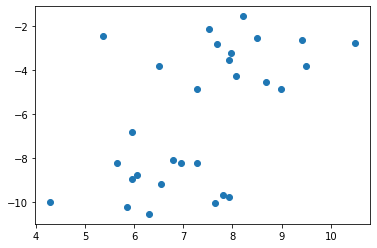

In [281]:
from matplotlib import pyplot as plt #นำเข้า pyplot โดยตั้งชื่อว่า plt นำมาเพื่อพล็อตกราฟ
plt.scatter(Xd[:,0],Xd[:,1]) #จะแบ่งเป็น 2 กลุ่ม ตาม centers=2

In [282]:
from sklearn.cluster import KMeans

In [283]:
KMclust=KMeans(n_clusters=2) # n_clusters=2 การกำหนดตัวแบ่งว่าจะแบ่งให้มีกลุ่ม 2 กลุ่ม

In [284]:
KMclust.fit(Xd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [285]:
label=KMclust.predict(Xd) # predict ว่าอยู่ในกลุ่มไหน

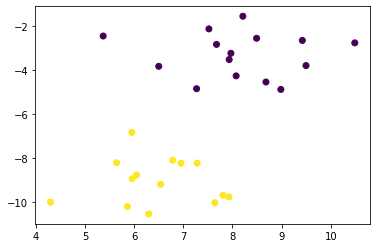

In [286]:
plt.scatter(Xd[:,0], Xd[:,1], c=label) # เปลี่ยนสีให้เป็นไปตาม label ของเราโดยการสุ่ม

In [287]:
import numpy as np
import seaborn as sns

In [288]:
n_group = 2 # จำนวนกลุ่ม
n_duplicate = 30 # จำนวนทำซ้ำสูงสุด
tol = 0.0001 # ค่าความเปลี่ยนแปลงสูงสุดที่ยอมให้หยุดได้
sumagicult = np.random.choice(len(Xd),n_group,replace=0)
X_cend = Xd[sumagicult] # จุดเซนทรอยด์ตั้งต้น เลือกแบบสุ่ม
# วนซ้ำเพื่อปรับเซนทรอยด์
for i in range(n_duplicate):
    distance = ((X_cend[None]-Xd[:,None])**2).sum(2) # วัดระยะห่างจากจุดถึงเซนทรอยด์
    gruopd = distance.argmin(1) # ตัดสินกลุ่มของจุดโดยเลือกเซนทรอยด์ที่ใกล้สุด
    X_cen_maid = np.empty_like(X_cend) # จุดเซนทรอยด์ใหม่
    # วนซ้ำเพื่อหาตำแหน่งเซนทรอยด์ใหม่
    for j in range(n_group):
        if(len(Xd[gruopd==j])): # ถ้ามีสมาชิกในกลุ่ม
            X_cen_maid[j] = Xd[gruopd==j].mean(0) # กำหนดเซนทรอยด์ใหม่เป็นตำแหน่งเฉลี่ยของทุกจุดในกลุ่ม
        else: # ถ้าในกลุ่มว่างเปล่าก็ให้สุ่มเซนทรอยด์ใหม่
            X_cen_maid[j] = Xd[np.random.randint(len(Xd))]
    if(np.allclose(X_cend,X_cen_maid,atol=tol)): # ถ้าความเปลี่ยนแปลงน้อยกว่าค่าที่กำหนดก็ให้หยุด
        X_cend = X_cen_maid
        break
    X_cend = X_cen_maid # ย้ายจุดเซนทรอยด์ไปยังตำแหน่งใหม่

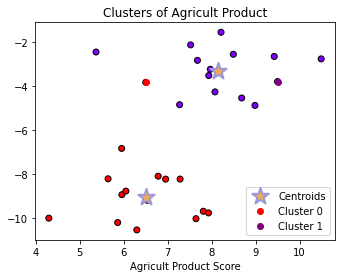

In [289]:
distance = ((X_cend[None]-Xd[:,None])**2).sum(2)
zd = distance.argmin(1)
plt.gca(aspect=0.5)
plt.scatter(Xd[:,0],Xd[:,1],c=zd,edgecolor='k',cmap='rainbow')
plt.scatter(X_cend[:,0],X_cend[:,1],300,'#EEAA55',marker='*',edgecolor='#9999DD',lw=2, label = 'Centroids')
plt.scatter(Xd[0,0], Xd[0,1], c = 'red', label = 'Cluster 0')
plt.scatter(Xd[1,0], Xd[1,1], c = 'purple', label = 'Cluster 1')
plt.title('Clusters of Agricult Product')
plt.xlabel('Agricult Product Score')
plt.legend()
plt.show()
#คือการกำหนดหัวเรื่องเพื่อให้มองชัดขึ้นว่าเรื่องนี้เป็นเรื่องอะไร และมีการกำหนดว่า สีที่ปรากฏหมายถึงค่าของอะไร รวมถึงการทำการกำหนดจุดcentriodด้วย

In [290]:
ssed = 0
for i in range(n_group):
    ssed += np.sum(distance[zd==i,i])
print(ssed)
#พิจารณาผลรวมของระยะห่างระหว่างจุดข้อมูลไปยังเซนทรอยด์นั้นๆ ซึ่งเรียกว่าผลรวมความคลาดเคลื่อนกำลังสอง (sum of squared errors, SSE)

63.576100408691644


In [291]:
KMclust.cluster_centers_ #คือตำแหน่งของจุดเซนทรอยด์ที่ได้มา จะมีขนาดเท่ากับ (จำนวนเซนทรอยด์,จำนวนมิติ)

array([[ 8.13947848, -3.31827127],
       [ 6.50009241, -9.04836637]])

In [292]:
KMclust.transform(Xd) # ระยะห่างของแต่ละจุดกับ centroid

array([[1.71502288, 5.22433055],
       [1.43676727, 6.051918  ],
       [6.3759617 , 1.45638034],
       [1.77194286, 7.69343614],
       [0.19199905, 5.99954475],
       [4.97911796, 1.13683572],
       [4.13624668, 2.2853245 ],
       [0.67584029, 6.33233927],
       [0.94342875, 5.0411994 ],
       [1.33381887, 5.01138785],
       [6.0840327 , 0.14498262],
       [6.02263401, 0.55331632],
       [0.84527829, 6.79687046],
       [1.77073604, 4.85719124],
       [2.4147624 , 7.44772825],
       [1.3459532 , 7.00058809],
       [0.28532218, 5.71545514],
       [7.70799077, 2.39962446],
       [5.49169876, 1.19760103],
       [2.90284685, 6.69717707],
       [6.72364818, 1.50246532],
       [5.04936591, 0.93858584],
       [7.44769557, 1.5000109 ],
       [4.96298781, 0.99706319],
       [5.83848006, 0.53015962],
       [1.7542805 , 4.27609885],
       [7.24805889, 1.3156954 ],
       [1.44697641, 7.03592877],
       [6.4467463 , 1.59552937]])

In [293]:
KMclust.labels_ #ผลการแบ่งกลุ่มของข้อมูลที่ใช้เรียนรู้

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1], dtype=int32)

In [294]:
Setempy=[] #Setempy เซ็ทว่างของสินค้าทางการเกษตร
for k in range(2, 10):
    m=KMeans(n_clusters=k) 
    m.fit(Xd)
    Setempy.append([k, m.inertia_])
Setempy
#K-Means จะตัดแบ่ง (Partition) วัตถุออกเป็น K กลุ่ม  และแทนค่าแต่ละกลุ่มด้วยค่าเฉลี่ยของกลุ่ม ซึ่งใช้เป็นจุดศูนย์กลาง (centroid) ของกลุ่มในการวัดระยะห่างของข้อมูลในกลุ่มเดียวกัน
#สร้าง ssd เป็นเซตว่าง แล้วกำหนดค่า k ตั้งแต่ 2 ถึง 10 จากนั้นทำการวนลูป for เพื่อหาค่า k means ของแต่ละ k 
#จากผลสรุปได้ว่าตารางนี้ควรจัดกลุ่มเป็น 2 กลุ่ม เนื่องจากมีค่า k means สูงที่สุด

[[2, 63.576100408691644],
 [3, 50.16242958503659],
 [4, 40.830568528739256],
 [5, 31.602921629365813],
 [6, 24.788454054690018],
 [7, 18.203113470165984],
 [8, 14.520075311849666],
 [9, 11.81564814025971]]

In [295]:
xyd= np.array(Setempy) #Setempy เซ็ทว่างของสินค้าทางการเกษตร
print(xyd) #xyd ตัวแปรของ xy ของการหย่า

[[ 2.         63.57610041]
 [ 3.         50.16242959]
 [ 4.         40.83056853]
 [ 5.         31.60292163]
 [ 6.         24.78845405]
 [ 7.         18.20311347]
 [ 8.         14.52007531]
 [ 9.         11.81564814]]


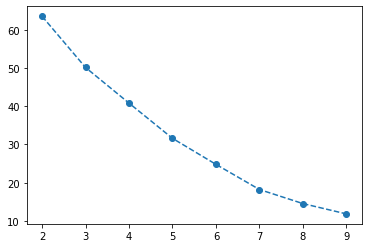

In [296]:
plt.plot(xyd[:, 0], xyd[:, 1], linestyle='--', marker='o') #xyd ตัวแปรของ xy ของการหย่า

จากกราฟด้านบนจะเห็นว่า ค่าK จะเท่ากับ 5 เนื่องจากเป็นมุมที่คมที่สุดของกราฟ ดังนั้นค่าที่ดีที่สุดสำหรับ K คือ 5

In [297]:
agp=pd.DataFrame(Setempy, columns=['k', 'Setempy']) #agp ตัวแปรของสินค้าทางการเกษตร
agp

,k,Setempy
0,2,63.576100
1,3,50.162430
2,4,40.830569
3,5,31.602922
4,6,24.788454
5,7,18.203113
6,8,14.520075
7,9,11.815648


In [298]:
agp['pct_chg']=agp['Setempy'].pct_change() * 100
agp

,k,Setempy,pct_chg
0,2,63.576100,NaN
1,3,50.162430,-21.098606
2,4,40.830569,-18.603288
3,5,31.602922,-22.599849
4,6,24.788454,-21.562777
5,7,18.203113,-26.566161
6,8,14.520075,-20.233012
7,9,11.815648,-18.625435


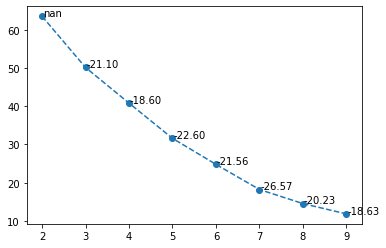

In [299]:
plt.plot(agp['k'], agp['Setempy'], linestyle='--', marker='o')
for index, row in agp.iterrows():
    plt.text(row['k']+.02, row['Setempy']+.02, f'{row["pct_chg"]:.2f}', fontsize=10)

นำเข้ากลุ่มที่จัดไว้โดยการเพิ่มที่คอลัม cluster

In [300]:
data1['cluster']=KMclust.labels_
data1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,country,total,cluster
0,SAUDI ARABIA,"927324.7552,249,315.002,143,682.001,192,758.30...",0
1,CHINA,"645736.271,160,075.001,519,815.00782,375.00794...",0
2,KOREA REPUBLIC OF,"392424.0451,875,370.001,724,557.001,332,152.90...",1
3,QATAR,"434565.1042647,240.00890,090.00665,440.00673,7...",0
4,MALAYSIA,"252642.6558709,000.00512,800.00420,400.00708,0...",0


In [301]:
data1.groupby('cluster').describe().T #ดูรายละเอียดในตารางนี้

cluster                                                         0                                                  1
country count                                                  15                                                 14
        unique                                                 15                                                 14
        top                                               FINLAND                           RUSSIAN FEDERATION (CIS)
        freq                                                    1                                                  1
total   count                                                  15                                                 14
        unique                                                 15                                                 14
        top     252642.6558709,000.00512,800.00420,400.00708,0...  51,819.16659,500.00479,450.00407,100.00582,588...
        freq                                                    1                                                  1

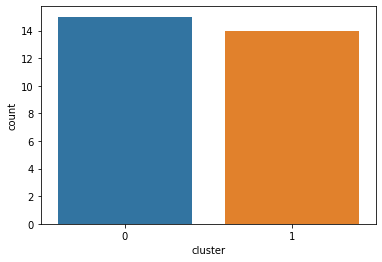

In [302]:
sns.countplot(x='cluster', data=data1) #สร้างกราฟแท่งดูว่าแค่ละกลุ่มมีจำนวนเท่าไหร่ จากรูป

In [303]:
data1

,country,total,cluster
0,SAUDI ARABIA,"927324.7552,249,315.002,143,682.001,192,758.30...",0
1,CHINA,"645736.271,160,075.001,519,815.00782,375.00794...",0
2,KOREA REPUBLIC OF,"392424.0451,875,370.001,724,557.001,332,152.90...",1
3,QATAR,"434565.1042647,240.00890,090.00665,440.00673,7...",0
4,MALAYSIA,"252642.6558709,000.00512,800.00420,400.00708,0...",0
5,RUSSIAN FEDERATION (CIS),"596639.4825101,198.00120,678.00194,505.00392,6...",1
6,KUWAIT,"75,065.4028,790.0029,875.00160,147.20267,567.2...",1
7,EGYPT,"4,292.37327,000.00313,200.00149,603.00294,000....",0
8,NORWAY,"195,650.6035,776.00427,341.00152,960.00455,887...",0
9,CANADA,"247490.3583193,252.00268,944.00273,904.00190,1...",0


In [304]:
data1.groupby('cluster').head().sort_values('cluster')

,country,total,cluster
0,SAUDI ARABIA,"927324.7552,249,315.002,143,682.001,192,758.30...",0
1,CHINA,"645736.271,160,075.001,519,815.00782,375.00794...",0
3,QATAR,"434565.1042647,240.00890,090.00665,440.00673,7...",0
4,MALAYSIA,"252642.6558709,000.00512,800.00420,400.00708,0...",0
7,EGYPT,"4,292.37327,000.00313,200.00149,603.00294,000....",0
2,KOREA REPUBLIC OF,"392424.0451,875,370.001,724,557.001,332,152.90...",1
5,RUSSIAN FEDERATION (CIS),"596639.4825101,198.00120,678.00194,505.00392,6...",1
6,KUWAIT,"75,065.4028,790.0029,875.00160,147.20267,567.2...",1
10,ISRAEL,"51,819.16659,500.00479,450.00407,100.00582,588...",1
11,JAPAN,"128.07227,592.00226,575.00684,832.00283,770.00...",1


In [305]:
data1.rename(columns={'cluster':'C_Agicult'},inplace=True) #เปลี่ยนชื่อจากคอลัม cluster เป็น C_Agicult
data1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,country,total,C_Agicult
0,SAUDI ARABIA,"927324.7552,249,315.002,143,682.001,192,758.30...",0
1,CHINA,"645736.271,160,075.001,519,815.00782,375.00794...",0
2,KOREA REPUBLIC OF,"392424.0451,875,370.001,724,557.001,332,152.90...",1
3,QATAR,"434565.1042647,240.00890,090.00665,440.00673,7...",0
4,MALAYSIA,"252642.6558709,000.00512,800.00420,400.00708,0...",0
5,RUSSIAN FEDERATION (CIS),"596639.4825101,198.00120,678.00194,505.00392,6...",1
6,KUWAIT,"75,065.4028,790.0029,875.00160,147.20267,567.2...",1
7,EGYPT,"4,292.37327,000.00313,200.00149,603.00294,000....",0
8,NORWAY,"195,650.6035,776.00427,341.00152,960.00455,887...",0
9,CANADA,"247490.3583193,252.00268,944.00273,904.00190,1...",0


>#### **เชื่อมตารางข้อมูลเพื่อวิเคราะห์ระดับ Data mining**

In [306]:
Data1 = merged_04[['country','population(million)','living expenses(USD)','avg income(USD)']]
Data1

,country,population(million),living expenses(USD),avg income(USD)
0,SAUDI ARABIA,34.22,952,"4,754"
1,CHINA,"1,400",752,884
2,KOREA REPUBLIC OF,51,"1,154","2,738"
3,QATAR,2,"1,856","4,684"
4,MALAYSIA,30,652,882
5,RUSSIAN FEDERATION (CIS),146,424,891
6,KUWAIT,4.207,"1,326","3,024"
7,EGYPT,93,449,250
8,NORWAY,5.39,"2,074","6,521"
9,CANADA,36.28,"1,701","3,620"


In [307]:
Data2 = Data1.merge(data1,how='right',left_on='country',right_on='country') #สร้างตัวแปร Data2 มารับการรวมตารางของตาราง Data1 กับ data1 โดยการใช้คอลัม country เป็นคีย์เชื่อมทั้งสองตาราง
Data2

,country,population(million),living expenses(USD),avg income(USD),total,C_Agicult
0,SAUDI ARABIA,34.22,952,"4,754","927324.7552,249,315.002,143,682.001,192,758.30...",0
1,CHINA,"1,400",752,884,"645736.271,160,075.001,519,815.00782,375.00794...",0
2,KOREA REPUBLIC OF,51,"1,154","2,738","392424.0451,875,370.001,724,557.001,332,152.90...",1
3,QATAR,2,"1,856","4,684","434565.1042647,240.00890,090.00665,440.00673,7...",0
4,MALAYSIA,30,652,882,"252642.6558709,000.00512,800.00420,400.00708,0...",0
5,RUSSIAN FEDERATION (CIS),146,424,891,"596639.4825101,198.00120,678.00194,505.00392,6...",1
6,KUWAIT,4.207,"1,326","3,024","75,065.4028,790.0029,875.00160,147.20267,567.2...",1
7,EGYPT,93,449,250,"4,292.37327,000.00313,200.00149,603.00294,000....",0
8,NORWAY,5.39,"2,074","6,521","195,650.6035,776.00427,341.00152,960.00455,887...",0
9,CANADA,36.28,"1,701","3,620","247490.3583193,252.00268,944.00273,904.00190,1...",0


In [308]:
Data = Data2[['C_Agicult','population(million)','living expenses(USD)','avg income(USD)']]
Data#เลือกเฉพาะคอลัมที่ต้องการได้ดังนี้

,C_Agicult,population(million),living expenses(USD),avg income(USD)
0,0,34.22,952,"4,754"
1,0,"1,400",752,884
2,1,51,"1,154","2,738"
3,0,2,"1,856","4,684"
4,0,30,652,882
5,1,146,424,891
6,1,4.207,"1,326","3,024"
7,0,93,449,250
8,0,5.39,"2,074","6,521"
9,0,36.28,"1,701","3,620"


In [309]:
Data.shape

(29, 4)

In [310]:
Data.dtypes

C_Agicult                int32
population(million)     object
living expenses(USD)    object
avg income(USD)         object
dtype: object

In [311]:
import pandas as pd
import re

In [312]:
#strip values to float type
Datafloat = Data.replace('[^\d.]','', regex=True).astype(float)
Datafloat

,C_Agicult,population(million),living expenses(USD),avg income(USD)
0,0.0,34.220,952.0,4754.0
1,0.0,1400.000,752.0,884.0
2,1.0,51.000,1154.0,2738.0
3,0.0,2.000,1856.0,4684.0
4,0.0,30.000,652.0,882.0
5,1.0,146.000,424.0,891.0
6,1.0,4.207,1326.0,3024.0
7,0.0,93.000,449.0,250.0
8,0.0,5.390,2074.0,6521.0
9,0.0,36.280,1701.0,3620.0


In [313]:
Datafloat['total'] = Data['C_Agicult'].astype('int')
Datafloat

,C_Agicult,population(million),living expenses(USD),avg income(USD),total
0,0.0,34.220,952.0,4754.0,0
1,0.0,1400.000,752.0,884.0,0
2,1.0,51.000,1154.0,2738.0,1
3,0.0,2.000,1856.0,4684.0,0
4,0.0,30.000,652.0,882.0,0
5,1.0,146.000,424.0,891.0,1
6,1.0,4.207,1326.0,3024.0,1
7,0.0,93.000,449.0,250.0,0
8,0.0,5.390,2074.0,6521.0,0
9,0.0,36.280,1701.0,3620.0,0


In [314]:
Data = Datafloat[['total','population(million)','living expenses(USD)','avg income(USD)']]
Data#เลือกเฉพาะคอลัมที่ต้องการได้ดังนี้

,total,population(million),living expenses(USD),avg income(USD)
0,0,34.220,952.0,4754.0
1,0,1400.000,752.0,884.0
2,1,51.000,1154.0,2738.0
3,0,2.000,1856.0,4684.0
4,0,30.000,652.0,882.0
5,1,146.000,424.0,891.0
6,1,4.207,1326.0,3024.0
7,0,93.000,449.0,250.0
8,0,5.390,2074.0,6521.0
9,0,36.280,1701.0,3620.0


In [315]:
Data.dtypes

total                     int64
population(million)     float64
living expenses(USD)    float64
avg income(USD)         float64
dtype: object

#**Data Mining**

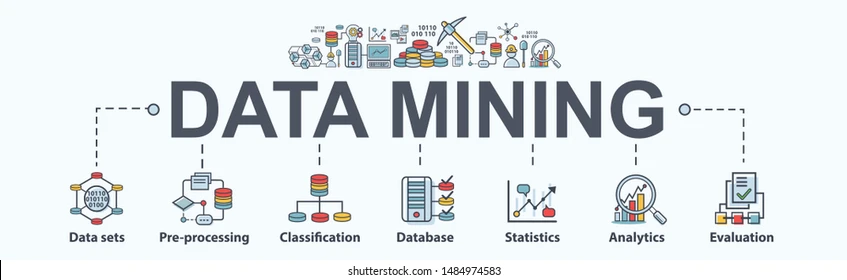

#**การคัดเลือกตัวแบบ**

##KNN

In [316]:
from sklearn.model_selection import train_test_split 
from sklearn import datasets

> โดยจะกำหนดแบ่ง train กับ test โดย test size = 0.2 

In [317]:
X = Data.iloc[:,1:4] #กำหนดค่า X โดยให้เอาทุกแถว ตั้งแต่คอลัมที่ 2 ถึง 5
y = Data[['total']] #กำหนดค่า y โดยให้เอาทุกแถว 
# train-test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1, stratify=y)
# train-validation
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=6)

##**Train Model**

>  Import

In [318]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

>  Define นิยามโมเดล

In [319]:
KNN_1=KNeighborsClassifier(n_neighbors=4) #n_neighbors คือ จำนวนเพื่อนบ้านที่จะพิจารณา

> Train เพื่อสร้างโมเดล

In [320]:
KNN_1.fit(X_train , y_train)
 #input มี2ตัว คือ X และ y 
#โดยใช้น้ำหนักแต่ละจุดเท่ากัน

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

>**Test** ใช้คำสั่ง .predict โดยที่ข้อมูลมากจาก X_test

In [321]:
KNN_1.predict(X_test) #โดยใช้ predict ทำนายว่าตัวที่ใกล้สุด 3 ตัวแรก คือ 2

array([0, 0, 1, 0, 0, 0])

ใช้คำสั่ง .predict_proba เป็นการคำนวณความน่าจะเป็นว่า จำนวนประชากร รายได้เฉลี่ย ค่าครองชีพที่นำเข้าโมเดลนั้นจะอยู่กลุ่มไหนของปริมาณการนำเข้าสินค้าทางการเกษตรกี่เปอร์เซ็นต์

In [322]:
KNN_1.predict_proba(X_test)

array([[0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.5 , 0.5 ],
       [0.75, 0.25],
       [1.  , 0.  ]])

##**การวัดผลของตัวแบบ KNN**

ตรวจสอบความแม่นยำของโมเดล ว่าสามารถจำแนกกลุ่มปริมาณการนำเข้าสินค้าทางการเกษตร ว่าอยู่กลุ่มมาก กลุ่มน้อย ได้ที่ความแม่นยำกี่เปอร์เซ็นต์

In [323]:
from sklearn.model_selection import cross_val_score

In [324]:
cross_val_score(KNN_1, X_train, y_train, cv=12).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 11 members, which is less than n_splits=12.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

0.625

>**สรุปได้ว่า** จำนวนประชากร รายได้เฉลี่ย ค่าครองชีพโดยเฉลี่ย สามารถทำนายจำนวนคู่หย่าว่าแต่ละจังหวัดจัดอยู่ในกลุ่มมากหรือน้อยได้ ความแม่นยำ 62.50% เมื่อใช้โมเดล KNN

#**Desition Tree**

>**Import**

In [325]:
from sklearn.tree import DecisionTreeClassifier

>**Define**

In [326]:
myTree=DecisionTreeClassifier(criterion='entropy',max_depth=2)
#criterion คือ default เป็น ‘gini’ ซึ่งเราสามารถจะเลือกเป็น ‘entropy’ 
#max_depth ความลึกของ tree หรือจำนวน level ที่มากที่สุด ของ node ที่จะทำการ split

>**Train**

In [327]:
myTree.fit(X_train,y_train) #กำหนดขอบเขตของข้อมูล

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

>**Test**

In [328]:
y_pred = myTree.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0])

>**Draw Tree**

In [329]:
from sklearn.tree import plot_tree

[Text(200.88000000000002, 181.2, 'X[1] <= 1817.0\nentropy = 0.999\nsamples = 23\nvalue = [12, 11]'),
 Text(133.92000000000002, 108.72, 'X[1] <= 1004.5\nentropy = 0.993\nsamples = 20\nvalue = [9, 11]'),
 Text(66.96000000000001, 36.23999999999998, 'entropy = 0.946\nsamples = 11\nvalue = [7, 4]'),
 Text(200.88000000000002, 36.23999999999998, 'entropy = 0.764\nsamples = 9\nvalue = [2, 7]'),
 Text(267.84000000000003, 108.72, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]')]

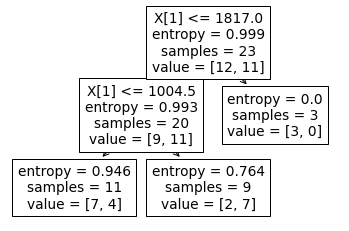

In [330]:
plot_tree(myTree)

##**การวัดผลของตัวแบบ Disition tree**

>**Evaluation**

In [331]:
from sklearn.metrics import classification_report, confusion_matrix

In [332]:
cross_val_score(myTree, X_train, y_train, cv=12).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 11 members, which is less than n_splits=12.
  % (min_groups, self.n_splits)), UserWarning)


0.4583333333333333

>**สรุปได้ว่า** จำนวนประชากร รายได้เฉลี่ย ค่าครองชีพโดยเฉลี่ย สามารถทำนายจำนวนคู่หย่าว่าแต่ละจังหวัดจัดอยู่ในกลุ่มมากหรือน้อยได้ ความแม่นยำ 41.67% เมื่อใช้โมเดล Decision Tree

#**Random Forest**

In [333]:
from sklearn.ensemble import RandomForestClassifier
skRF = RandomForestClassifier(random_state=1)
skRF.fit(X_train,y_train)
skRF.score(X,y)
y_predrf = skRF.predict(X_test)
y_predrf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([1, 0, 1, 0, 0, 0])

##**การวัดผลของตัวแบบ Random Forest**

In [334]:
cross_val_score(skRF, X_train, y_train, cv=12).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 11 members, which is less than n_splits=12.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

0.375

สรุปได้ว่า จำนวนประชากร รายได้ ค่าครองชีพ มีผลต่อการนำเข้าสินค้าทางการเกษตรว่าแต่ละประเทศจัดอยู่ในกลุ่มมากหรือน้อยได้ ด้วยความแม่นยำ 41.67% เมื่อใช้โมเดล RF

**จากการทำทั้งสามโมเดลการทำนายพบว่ จำนวนประชากร รายได้ ค่าครองชีพ มีผลต่อการนำเข้าสินค้าทางการเกษตรว่าแต่ละประเทศจัดอยู่ในกลุ่มมากหรือน้อยได้ ที่มีความความแม่นยำมากที่สุด 2 โมเดลจากทั้งสามโมเดลคือ KNN และ RF โดยมีความแม่นยำ 62.50% เท่ากัน**

#**Visualization**
ของผลการวัดของแต่ละโมเดล

In [335]:
import matplotlib.pyplot as plt
import numpy as np

##**วัดผลเปรียบเทียบความแม่นยำ**

In [336]:
import numpy as np


labels = ['KNN', 'Desition Tree', 'RF']
cross_val_score = [62.50, 54.16, 62.50]

No handles with labels found to put in legend.


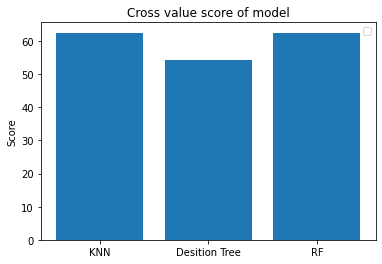

In [337]:
width = 0.35  #ขนาดของแท่ง

plt.bar([0,1,2],cross_val_score)
plt.ylabel('Score')
plt.title('Cross value score of model')
plt.xticks([0,1,2],labels)
plt.legend();
plt.show()

>**เราจะเห็นว่าโมเดล KNN และ Random Forest มีความแม่นยำเท่ากัน**

##**ดูความสัมพันธ์ของปัจจัย**

**แสดงข้อมูลที่จะทำการวิเคราะห์**

In [338]:
merged_04

,id_x,country,View_x,population(million),religion,capital,language,living expenses(USD),avg income(USD),id_y,Title,Subtitle_PD,Unit,View_y,Freq,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019_x,Y2020_x,Unnamed: 20,id_x,Title_x,Subtitle_FC,Unit_x,View_x,Freq_x,Y2006_x,Y2007_x,Y2008_x,Y2009_x,Y2010_x,Y2011_x,Y2012_x,Y2013_x,Y2014_x,Y2015_x,Y2016_x,Y2017_x,Y2018_x,id_y,Title_y,Subtitle_PC,Unit_y,View_y,Freq_y,Y2006_y,Y2007_y,Y2008_y,Y2009_y,Y2010_y,Y2011_y,Y2012_y,Y2013_y,Y2014_y,Y2015_y,Y2016_y,Y2017_y,Y2018_y,Y2019_y,Y2020_y,PD_total,PC_total,FC_total,total
0,1,SAUDI ARABIA,ประเทศ,34.22,อิสลาม,ริยาด,อาหรับ,952,"4,754",1,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,SAUDI ARABIA,กิโลกรัม,ประเทศ,รายปี,"2,249,315.00","2,143,682.00","1,192,758.30","1,829,041.50","1,867,354.50","1,404,900.00","1,891,636.00","1,794,707.00","1,848,395.00","2,074,101.00","2,773,214.60","2,789,352.25","2,249,075.00","1,893,065.00",NaN,1.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"582,636.00","787,997.00","672,800.00","1,007,240.00","858,295.00","869,573.00","1,050,904.00","1,008,322.00","1,051,742.00","999,195.06","1,058,661.00","1,180,532.00",927324.755,1.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"4,910.26","6,203.20","6,274.60","4,090.01","4,427.09","1,961.45","2,980.24","6,262.60","5,689.41","3,091.60","8,182.42","8,778.60","3,060.24","6,909.40","6,849.32","2,249,315.002,143,682.001,192,758.301,829,041....","3,060.246,909.406,849.32",927324.755,"927324.7552,249,315.002,143,682.001,192,758.30..."
1,2,CHINA,ประเทศ,"1,400",พุทธ,ปักกิ่ง,จีนกลาง,752,884,2,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,CHINA,กิโลกรัม,ประเทศ,รายปี,"1,160,075.00","1,519,815.00","782,375.00","794,125.00","736,610.00","4,517.00","222,750.00","775,000.00","610,500.00","524,056.80","270,000.00","353,631.00","373,507.00",625150.9077,NaN,2.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,CHINA,เมตริกตัน,ประเทศ,รายปี,"270,060.53","675,840.83","569,348.49","427,921.66","723,621.87","728,466.14","610,452.25","472,653.78","746,048.64","708,995.53","865,728.91","949,696.61",645736.27,2.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,CHINA,เมตริกตัน,ประเทศ,รายปี,"124,916.36","46,686.16","47,946.76","5,675.89","6,870.47","9,738.47","3,796.07","6,479.97","4,689.86","3,568.08","37,890.50","44,373.90","5,544.60","3,023.29","3,460.13","1,160,075.001,519,815.00782,375.00794,125.0073...","5,544.603,023.293,460.13",645736.27,"645736.271,160,075.001,519,815.00782,375.00794..."
2,3,KOREA REPUBLIC OF,ประเทศ,51,ไม่นับถือ,โซล,เกาหลี,"1,154","2,738",3,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,KOREA REPUBLIC OF,กิโลกรัม,ประเทศ,รายปี,"1,875,370.00","1,724,557.00","1,332,152.90","1,002,940.60","1,778,427.60","763,273.50","1,201,126.00","1,347,522.00","1,503,846.00","1,750,676.64","2,392,512.50","1,974,102.84","2,274,394.04","2,501,570.96",NaN,3.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"426,401.90","472,745.91","287,250.00","417,478.50","435,164.70","528,138.20","443,139.60","425,380.00","358,277.95","303,010.00","276,959.51","335,142.27",392424.045,3.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"35,847","59,459.38","165,267.43","12,467.58","259,375.78","356,372.62","682,724.86","738,370.00","756,349.34","379,566.84","893,000.00","90,000.00","27,000.00","68,787.67","10,469.92","1,875,370.001,724,557.001,332,152.901,002,940....","27,000.0068,787.6710,469.92",392424.045,"392424.0451,875,370.001,724,557.001,332,152.90..."
3,4,QATAR,ประเทศ,2,อิสลาม,โดฮา,อาหรับ,"1,856","4,684",4,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,QATAR,กิโลกรัม,ประเทศ,รายปี,"647,240.00","890,090.00","665,440.00","673,721.00","742,418.00","732,970.00","783,931.00","1,465,079.00","2,444,760.00","1,472,750.00","3,733,675.00","5,940,771.00","6,381,231.75","2,592,601.20",NaN,4.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,QATAR,เมตริกตัน,ประเทศ,รายปี,"268,274.00","445,726.00","460,968.00","387,572.71","380,881.23

In [339]:
data_new1 = merged_04[['country','population(million)','living expenses(USD)','avg income(USD)','total']]
data_new1

,country,population(million),living expenses(USD),avg income(USD),total
0,SAUDI ARABIA,34.22,952,"4,754","927324.7552,249,315.002,143,682.001,192,758.30..."
1,CHINA,"1,400",752,884,"645736.271,160,075.001,519,815.00782,375.00794..."
2,KOREA REPUBLIC OF,51,"1,154","2,738","392424.0451,875,370.001,724,557.001,332,152.90..."
3,QATAR,2,"1,856","4,684","434565.1042647,240.00890,090.00665,440.00673,7..."
4,MALAYSIA,30,652,882,"252642.6558709,000.00512,800.00420,400.00708,0..."
5,RUSSIAN FEDERATION (CIS),146,424,891,"596639.4825101,198.00120,678.00194,505.00392,6..."
6,KUWAIT,4.207,"1,326","3,024","75,065.4028,790.0029,875.00160,147.20267,567.2..."
7,EGYPT,93,449,250,"4,292.37327,000.00313,200.00149,603.00294,000...."
8,NORWAY,5.39,"2,074","6,521","195,650.6035,776.00427,341.00152,960.00455,887..."
9,CANADA,36.28,"1,701","3,620","247490.3583193,252.00268,944.00273,904.00190,1..."


In [340]:
data_new1 = data_new1.dropna()
data_new1

,country,population(million),living expenses(USD),avg income(USD),total
0,SAUDI ARABIA,34.22,952,"4,754","927324.7552,249,315.002,143,682.001,192,758.30..."
1,CHINA,"1,400",752,884,"645736.271,160,075.001,519,815.00782,375.00794..."
2,KOREA REPUBLIC OF,51,"1,154","2,738","392424.0451,875,370.001,724,557.001,332,152.90..."
3,QATAR,2,"1,856","4,684","434565.1042647,240.00890,090.00665,440.00673,7..."
4,MALAYSIA,30,652,882,"252642.6558709,000.00512,800.00420,400.00708,0..."
5,RUSSIAN FEDERATION (CIS),146,424,891,"596639.4825101,198.00120,678.00194,505.00392,6..."
6,KUWAIT,4.207,"1,326","3,024","75,065.4028,790.0029,875.00160,147.20267,567.2..."
7,EGYPT,93,449,250,"4,292.37327,000.00313,200.00149,603.00294,000...."
8,NORWAY,5.39,"2,074","6,521","195,650.6035,776.00427,341.00152,960.00455,887..."
9,CANADA,36.28,"1,701","3,620","247490.3583193,252.00268,944.00273,904.00190,1..."


In [341]:
data_new1.isnull().any()
#จะเห็นว่าไม่มีค่า Missing แล้ว

country                 False
population(million)     False
living expenses(USD)    False
avg income(USD)         False
total                   False
dtype: bool

>**graph1**

## **จำนวนการนำเข้าสินค้ากับจำนวนประชากร**

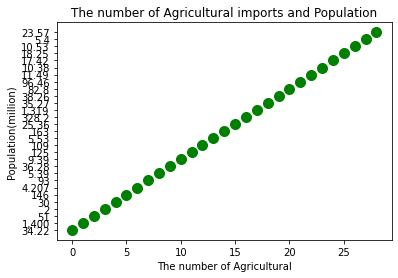

In [342]:
plt.scatter(range(len(data_new1['total'])),data_new1['population(million)'],s=100,c='g')
plt.xlabel('The number of Agricultural')
plt.ylabel('Population(million)')
plt.title('The number of Agricultural imports and Population')
plt.show()

In [343]:
range(len(data_new1.iloc[:,-1]))

range(0, 29)

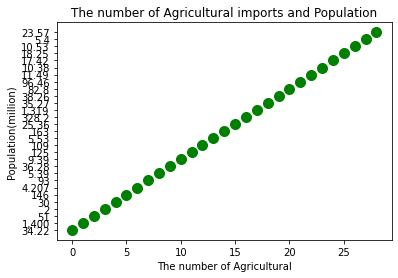

In [344]:
plt.scatter(range(len(data_new1.iloc[:,-1])),data_new1.iloc[:,1],s=100,c='g')
plt.xlabel('The number of Agricultural')
plt.ylabel('Population(million)')
plt.title('The number of Agricultural imports and Population')
plt.show()

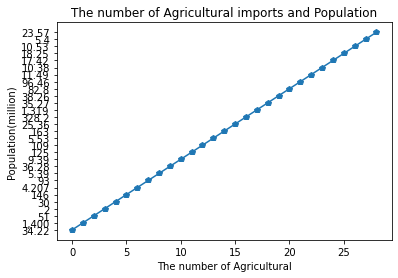

In [345]:
plt.plot(range(len(data_new1['total'])),data_new1['population(million)'],marker='p')
plt.xlabel('The number of Agricultural')
plt.ylabel('Population(million)')
plt.title('The number of Agricultural imports and Population')
plt.show()

**จากกราฟจะสามารถสรุปผลได้ว่า จำนวนประชากรเป็นอีกปัจจัยนึงที่มีผลต่อการผลิตสินค้าทางการเกษตร ถ้าประเทศที่มีประชากรจำนวนมากจะมีความสามารถผลิตสินค้าทางการเกษตรได้มากเช่นกัน
หรือกล่าวได้ว่า ปริมาณการนำเข้าสินค้าทางการเกษตรกับจำนวนประชากรมีความสัมพันธ์ไปในทิศทางเดียวกัน**

>**graph 2**

###**จำนวนการนำเข้าสินค้าทางเกษตรกับจำนวนค่าครองชีพ**

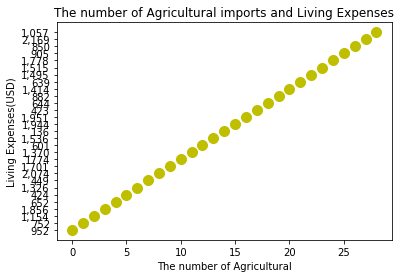

In [346]:
plt.scatter(range(len(data_new1['total'])),data_new1['living expenses(USD)'],s=100,c='y')
plt.ylabel('Living Expenses(USD)')
plt.xlabel('The number of Agricultural')
plt.title('The number of Agricultural imports and Living Expenses')
plt.show()

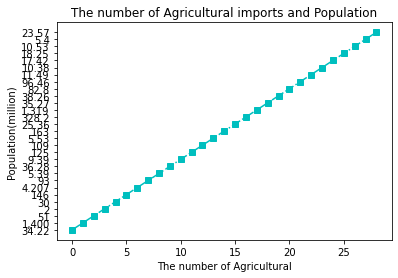

In [347]:
plt.plot(range(len(data_new1['total'])),data_new1['population(million)'],'s-.c')
plt.xlabel('The number of Agricultural')
plt.ylabel('Population(million)')
plt.title('The number of Agricultural imports and Population')
plt.show()

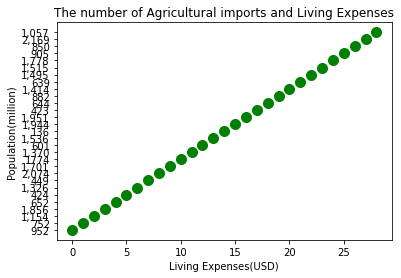

In [348]:
plt.scatter(range(len(data_new1.iloc[:,-1])),data_new1.iloc[:,2],s=100,c='g')
plt.xlabel('Living Expenses(USD)')
plt.ylabel('Population(million)')
plt.title('The number of Agricultural imports and Living Expenses')
plt.show()

**จากกราฟจะสามารถสรุปผลได้ว่า ค่าครองชีพเป็นอีกปัจจัยนึงที่มีผลต่อการผลิตสินค้าทางการเกษตร ถ้าประเทศที่มีค่าครองชีพสูงจะมีความสามารถผลิตสินค้าทางการเกษตรได้สูงเช่นกัน
หรือกล่าวได้ว่า ปริมาณการนำเข้าสินค้าทางการเกษตรกับค่าครองชีพมีความสัมพันธ์ไปในทิศทางเดียวกัน**

>**graph 3**

###**จำนวนการนำเข้าสินค้าทางเกษตรกับรายได้เฉลี่ย**

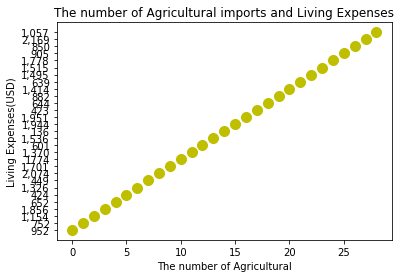

In [349]:
plt.scatter(range(len(data_new1['total'])),data_new1['living expenses(USD)'],s=100,c='y')
plt.ylabel('Living Expenses(USD)')
plt.xlabel('The number of Agricultural')
plt.title('The number of Agricultural imports and Living Expenses')
plt.show()

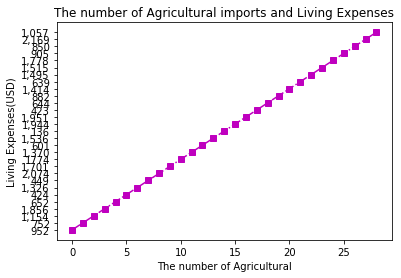

In [350]:
plt.plot(range(len(data_new1['total'])),data_new1['living expenses(USD)'],'s-.m')
plt.ylabel('Living Expenses(USD)')
plt.xlabel('The number of Agricultural')
plt.title('The number of Agricultural imports and Living Expenses')
plt.show()

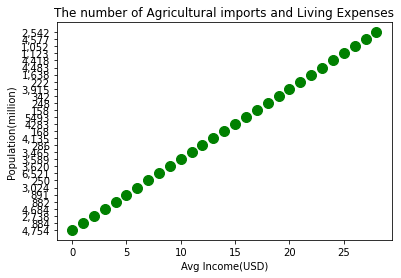

In [351]:
plt.scatter(range(len(data_new1.iloc[:,-1])),data_new1.iloc[:,3],s=100,c='g')
plt.xlabel('Avg Income(USD)')
plt.ylabel('Population(million)')
plt.title('The number of Agricultural imports and Living Expenses')
plt.show()

**จากกราฟจะสามารถสรุปผลได้ว่า รายได้เฉลี่ยเป็นอีกปัจจัยนึงที่มีผลต่อการผลิตสินค้าทางการเกษตร ถ้าประเทศที่มีรายได้เฉลี่ยสูงจะมีความสามารถผลิตสินค้าทางการเกษตรได้สูงเช่นกัน
หรือกล่าวได้ว่า ปริมาณการนำเข้าสินค้าทางการเกษตรกับรายได้เฉลี่ยมีความสัมพันธ์ไปในทิศทางเดียวกัน**

แก้กราฟเรียบร้อยแล้วค่ะ 

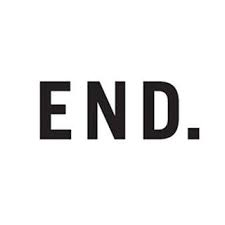

##จบโปรเจคนาตาชา